**Predictive Framework for Credit Card Default Risk**

# 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the Credit Card Default Dataset
df = pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
dataset = df.sample(n=5000,replace =False,random_state=1)

In [ ]:
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
10747,10748,310000,1,3,1,32,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12573,12574,10000,2,3,1,49,-1,-1,-2,-1,...,1690,1138,930,0,0,2828,0,182,0,1
29676,29677,50000,1,2,1,28,-1,-1,-1,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8856,8857,80000,2,3,1,52,2,2,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21098,21099,270000,1,1,2,34,1,2,0,0,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [ ]:
dataset['EDUCATION'].values

array([3, 3, 2, ..., 1, 2, 3])

In [ ]:
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
6132,6133,360000,1,2,1,57,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
5642,5643,80000,2,2,2,41,-1,2,2,2,...,69465,70545,72233,3000,2500,3000,2500,3000,0,0
8777,8778,70000,2,1,2,24,-1,0,0,0,...,20011,19147,19056,2000,3000,3000,2000,2000,3668,0
23489,23490,140000,2,2,2,33,0,0,0,0,...,62253,69594,68262,2137,2300,2278,9300,0,3000,0
7450,7451,150000,2,3,2,32,0,0,0,0,...,77078,66927,50881,2500,3000,2000,5000,5055,5000,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 10747 to 7450
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          5000 non-null   int64
 1   LIMIT_BAL                   5000 non-null   int64
 2   SEX                         5000 non-null   int64
 3   EDUCATION                   5000 non-null   int64
 4   MARRIAGE                    5000 non-null   int64
 5   AGE                         5000 non-null   int64
 6   PAY_0                       5000 non-null   int64
 7   PAY_2                       5000 non-null   int64
 8   PAY_3                       5000 non-null   int64
 9   PAY_4                       5000 non-null   int64
 10  PAY_5                       5000 non-null   int64
 11  PAY_6                       5000 non-null   int64
 12  BILL_AMT1                   5000 non-null   int64
 13  BILL_AMT2                   5000 non-null   int64
 14  BILL_AMT3

In [ ]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.0000,5.000000e+03,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,14862.920400,169306.000000,1.597600,1.851400,1.550400,35.565800,-0.038600,-0.147200,-0.169000,-0.219200,...,43592.987800,40624.531600,39100.713400,5712.7126,6.168286e+03,5847.442000,5219.85440,5081.839800,5716.655000,0.220600
std,8680.023278,131525.503822,0.490431,0.794383,0.521837,9.273924,1.088001,1.173971,1.191101,1.170566,...,65300.378231,61031.613035,59561.490754,15974.2450,2.945517e+04,19111.264928,16468.05314,16284.349383,20330.666372,0.414693
min,3.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-73895.000000,0.0000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000
25%,7193.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2485.750000,1745.000000,1244.500000,1000.0000,7.997500e+02,396.000000,316.00000,278.500000,169.250000,0.000000
50%,14871.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19191.500000,18201.500000,17079.000000,2089.0000,2.011500e+03,1811.500000,1520.00000,1500.000000,1490.000000,0.000000
75%,22367.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,52586.750000,50074.250000,48956.000000,5000.0000,5.000000e+03,5000.000000,4137.75000,4200.000000,4000.000000,0.000000
max,29993.000000,750000.000000,2.000000,6.000000,3.000000,73.000000,7.000000,8.000000,8.000000,7.000000,...,628699.000000,508213.000000,513798.000000,405016.0000,1.684259e+06,508229.000000,331788.00000,379267.000000,528666.000000,1.000000


*   There are **5000 distinct Credit card clients.**
*   **The average value for the amount of credit card limit is 1,69,306 . The Standard deviation is usually large, max value being 7,30,000.**
*   Education Level is mostly **graduate school and university**.
*   Most of the clients are either **married or single.**
*   **Average age is 35.5yrs, with a standard deviation of 9.2.**
*   As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.219 means that there are 22.1% of credit card contracts that will default next month (will verify thi in the nexy sections of this analysis).

In [ ]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
dataset.index = dataset['ID']

In [ ]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
10748,10748,310000,1,3,1,32,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,12574,10000,2,3,1,49,-1,-1,-2,-1,...,1690,1138,930,0,0,2828,0,182,0,1
29677,29677,50000,1,2,1,28,-1,-1,-1,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0


In [ ]:
dataset.drop('ID',axis=1,inplace=True)

In [ ]:
dataset.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0


In [ ]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
dataset.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
# Assuming your DataFrame is named 'df'
dataset['SEX'] = dataset['SEX'].replace({1: 'male', 2: 'female'})
dataset['EDUCATION'] = dataset['EDUCATION'].replace({1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'})
dataset['MARRIAGE'] = dataset['MARRIAGE'].replace({1: 'married', 2: 'single', 3: 'others'})

In [ ]:
dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,male,high school,married,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,female,high school,married,49,-1,-1,-2,-1,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,male,university,married,28,-1,-1,-1,0,-1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,female,high school,married,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,male,graduate school,single,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,360000,male,university,married,57,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
5643,80000,female,university,single,41,-1,2,2,2,2,...,69465,70545,72233,3000,2500,3000,2500,3000,0,0
8778,70000,female,graduate school,single,24,-1,0,0,0,0,...,20011,19147,19056,2000,3000,3000,2000,2000,3668,0


In [ ]:
dataset['EDUCATION'].values

array(['high school', 'high school', 'university', ..., 'graduate school',
       'university', 'high school'], dtype=object)

In [ ]:
# Assuming your DataFrame is named 'df'
dataset['SEX'] = dataset['SEX'].astype(str)
dataset['EDUCATION'] = dataset['EDUCATION'].astype(str)
dataset['MARRIAGE'] = dataset['MARRIAGE'].astype(str)
dataset['AGE']=dataset['AGE'].astype(int)

In [ ]:
dataset['SEX'].value_counts(dropna=False)

SEX
female    2988
male      2012
Name: count, dtype: int64

In [ ]:
dataset['EDUCATION'].value_counts(dropna=False)

EDUCATION
university         2336
graduate school    1772
high school         808
5                    41
others               28
6                    12
0                     3
Name: count, dtype: int64

In [ ]:
dataset['MARRIAGE'].value_counts(dropna=False)

MARRIAGE
single     2649
married    2289
others       55
0             7
Name: count, dtype: int64

In [ ]:
dataset = dataset.rename(columns={'default payment next month': 'def_pay',
                        'PAY_0': 'PAY_1'})
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,male,high school,married,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,female,high school,married,49,-1,-1,-2,-1,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,male,university,married,28,-1,-1,-1,0,-1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,female,high school,married,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,male,graduate school,single,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [ ]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

# **2.Data Visualisation and Analysis**

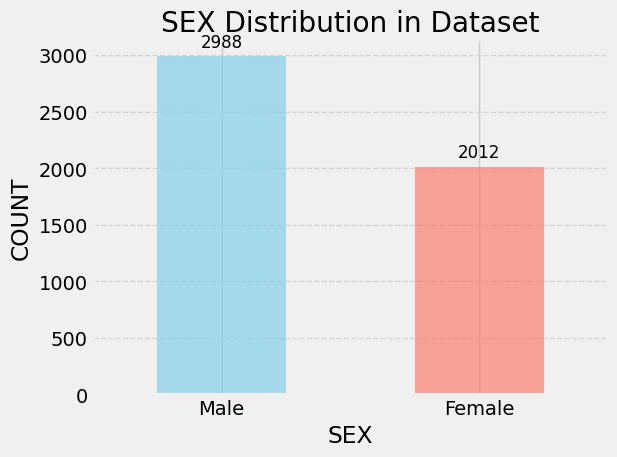

In [ ]:
import matplotlib.pyplot as plt

# Plotting histogram
plt.style.use('fivethirtyeight')

# Count occurrences of each SEX category
sex_counts = dataset['SEX'].value_counts()

# Define colors for each gender
colors = ['skyblue', 'salmon']  # You can choose colors that suit your preference

# Plotting the histogram with customized colors
sex_counts.plot(kind='bar', color=colors, alpha=0.7)

# Adding labels to the bars
for i, count in enumerate(sex_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=12)

plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX Distribution in Dataset')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)  # Customizing x-axis ticks to show labels clearly

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Number of Male Credit holder is less than female.

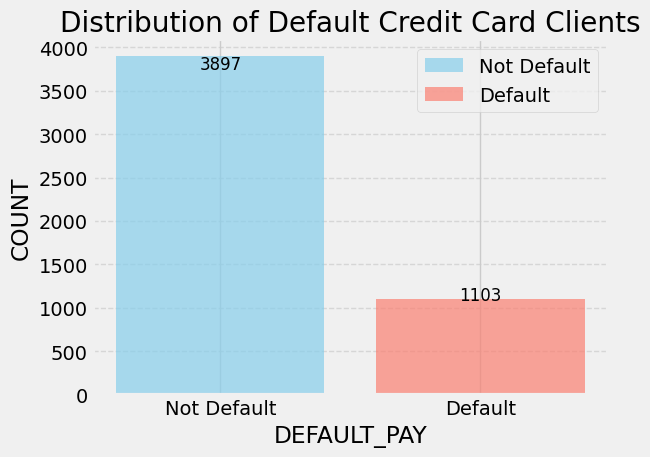

In [ ]:
import matplotlib.pyplot as plt

# Plotting histogram
plt.style.use('fivethirtyeight')

# Define positions for bars
positions = [0, 1]

# Count occurrences of "Not Default" and "Default"
not_default_count = dataset[dataset['def_pay'] == 0]['def_pay'].count()
default_count = dataset[dataset['def_pay'] == 1]['def_pay'].count()

# Plotting bars for "Not Default" and "Default" separately with transparent colors
plt.bar(positions[0], not_default_count, color='skyblue', label='Not Default', alpha=0.7)
plt.bar(positions[1], default_count, color='salmon', label='Default', alpha=0.7)

# Adding labels to the bars
plt.text(positions[0], not_default_count * 0.95, str(not_default_count), ha='center', va='bottom', fontsize=12)
plt.text(positions[1], default_count * 0.95, str(default_count), ha='center', va='bottom', fontsize=12)

plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Distribution of Default Credit Card Clients')
plt.xticks(positions, ['Not Default', 'Default'])  # Customizing x-axis ticks
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Percentage of defaulters are smaller than the non defaulters in the given dataset

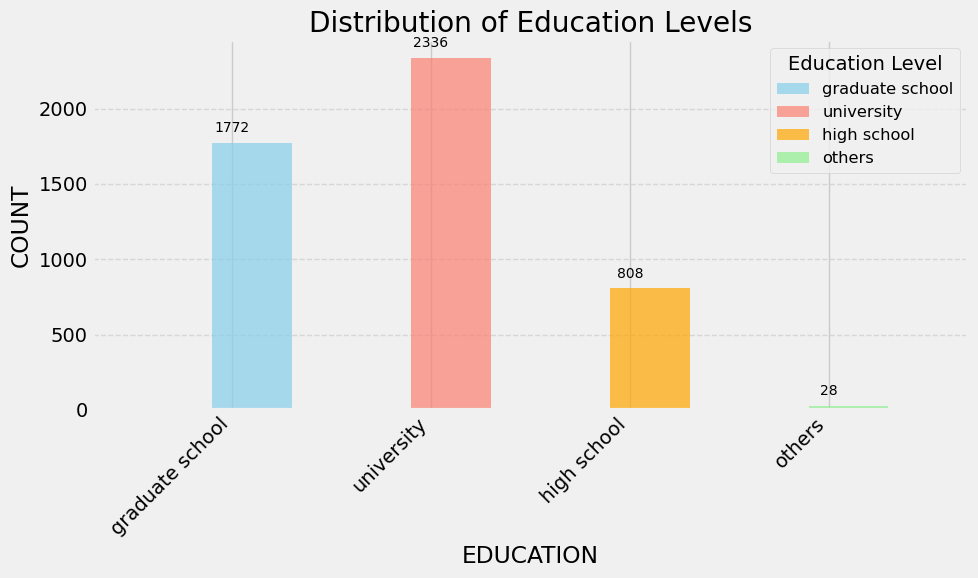

In [ ]:
import matplotlib.pyplot as plt

# Define figure size
plt.figure(figsize=(10, 6))

# Plotting histogram
plt.style.use('fivethirtyeight')

# Define colors for each education level
colors = {
    'graduate school': 'skyblue',
    'university': 'salmon',
    'high school': 'orange',
    'others': 'lightgreen'
}

# Plotting each category separately
for i, (education_level, color) in enumerate(colors.items()):
    data = dataset[dataset['EDUCATION'] == education_level]['EDUCATION']
    plt.hist(data, bins=5, color=color, alpha=0.7, label=education_level, width=0.4, align='mid')

    # Adding labels to the bars
    for j, count in enumerate(data.value_counts()):
        plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('Distribution of Education Levels')
plt.xticks(range(len(colors)), colors.keys(), rotation=45, ha='right')  # Customizing x-axis ticks
plt.legend(title='Education Level', loc='upper right', fontsize='small')  # Customizing legend
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### **More number of credit holders are university students followed by graduates and then High school**

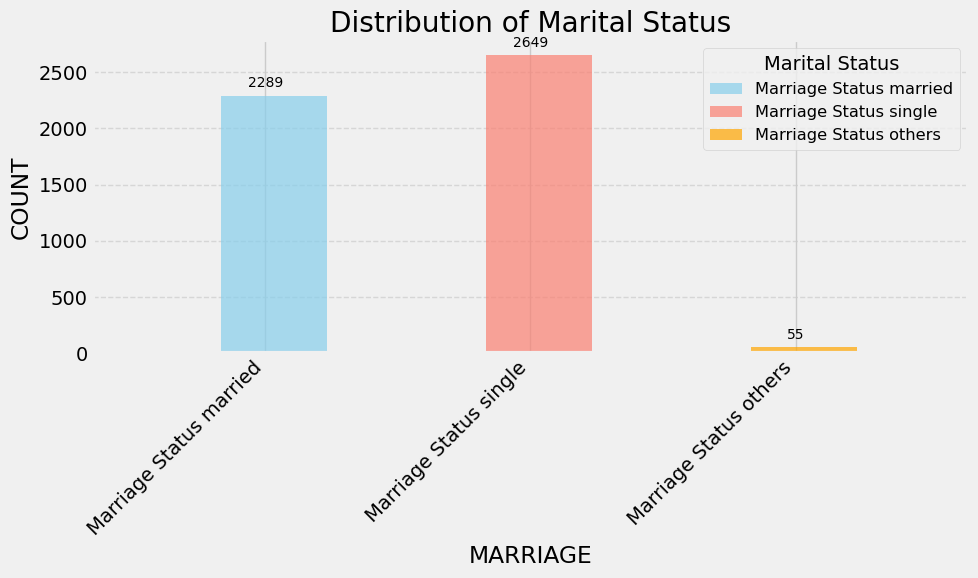

In [ ]:
import matplotlib.pyplot as plt

# Define figure size
plt.figure(figsize=(10, 6))

# Plotting histogram
plt.style.use('fivethirtyeight')

# Define colors for each marital status category
colors = {
    'married': 'skyblue',   # Married
    "single": 'salmon',    # Single
    "others": 'orange'     # Others
}


# Plotting each category separately
for i, (marriage_status, color) in enumerate(colors.items()):
    data = dataset[dataset['MARRIAGE'] == marriage_status]['MARRIAGE']
    plt.hist(data, bins=3, color=color, alpha=0.7, label=f'Marriage Status {marriage_status}', width=0.4, align='mid')

    # Adding labels to the bars
    for j, count in enumerate(data.value_counts()):
        plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('Distribution of Marital Status')
plt.xticks(range(len(colors)), [f'Marriage Status {marriage_status}' for marriage_status in colors.keys()], rotation=45, ha='right')  # Customizing x-axis ticks
plt.legend(title='Marital Status', loc='upper right', fontsize='small')  # Customizing legend
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()











### **More number of credit cards holder are Married**

Unique values in 'SEX': ['male' 'female']


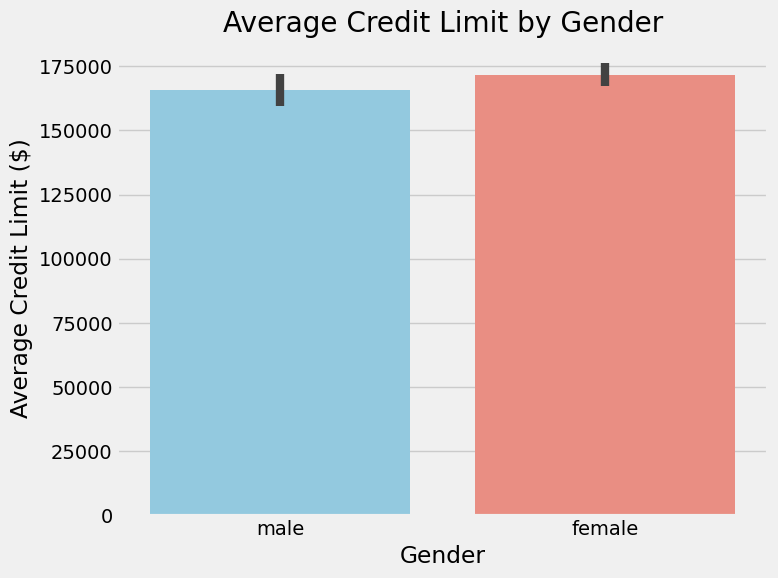

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
plt.style.use('fivethirtyeight')

# Checking the unique values
print("Unique values in 'SEX':", dataset['SEX'].unique())

# Ensure no leading/trailing whitespace
dataset['SEX'] = dataset['SEX'].str.strip()

# Create the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='SEX', y='LIMIT_BAL', data=dataset, palette={'male': 'skyblue', 'female': 'salmon'})

# Adding title and labels
plt.title('Average Credit Limit by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Credit Limit ($)')

plt.tight_layout()
plt.show()


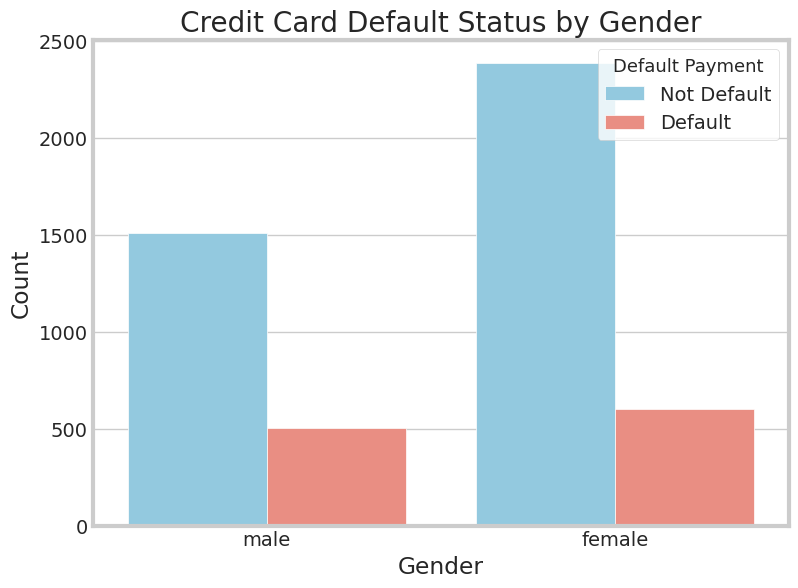

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn plot
sns.set_style("whitegrid")

# Define a specific color palette
palette_colors = {0: 'skyblue', 1: 'salmon'}

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='SEX', data=dataset, hue="def_pay", palette=palette_colors)

# Adding title and labels
plt.title('Credit Card Default Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Customizing legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Not Default', 'Default'], title='Default Payment', title_fontsize='13', loc='upper right')

plt.show()

#### **It is evident from the above output that females have overall less default payments wrt males**

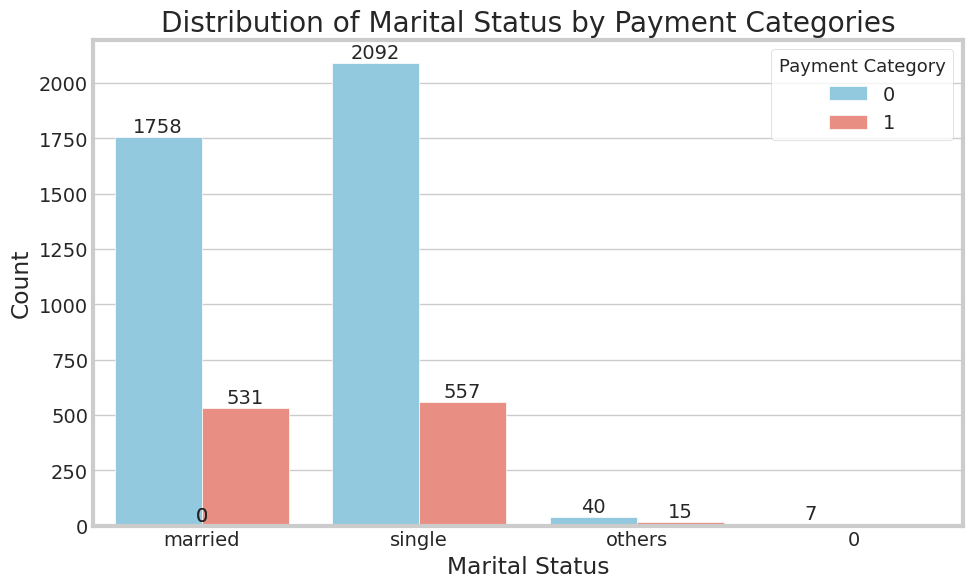

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Define a color palette
palette_colors = sns.color_palette(["skyblue", "salmon", "green", "purple"])  # Assigning colors for clarity

# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='MARRIAGE', hue='def_pay', data=dataset, palette=palette_colors)

# Adding title and labels
plt.title('Distribution of Marital Status by Payment Categories')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Customizing legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Payment Category', title_fontsize='13', loc='upper right')

# Annotating each bar with its count
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    # Place the text at the top of each bar; x position is p.get_x() + p.get_width() / 2 for center alignment
    ax.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha="center", va='bottom')

plt.show()


#### **From the above plot it is clear that those people who have marital status single have less default payment wrt married status people.**

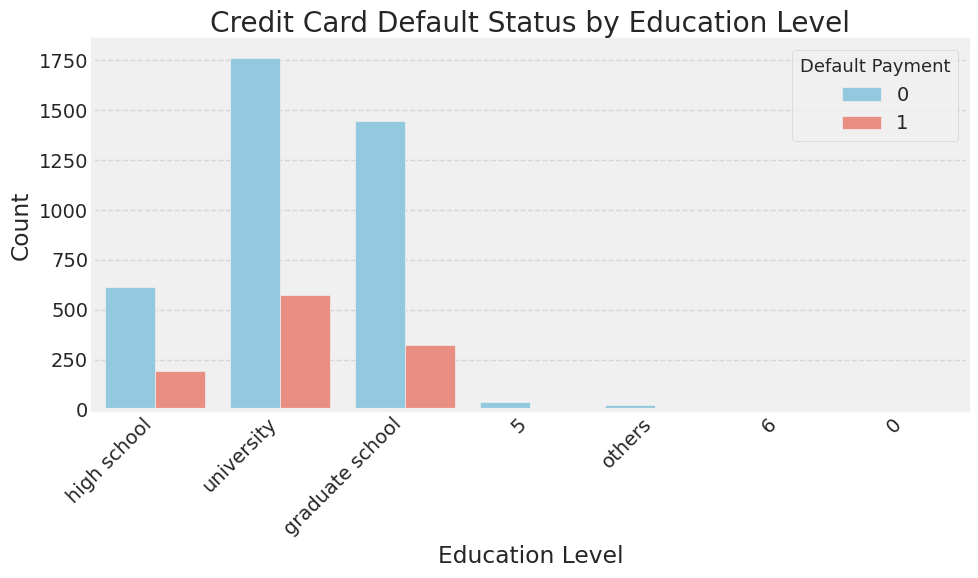

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define figure size and plot style
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
# Define colors for the default payment statuses
palette_colors = ['skyblue', 'salmon']  # You can adjust or expand this list based on actual def_pay statuses

# Create the countplot with custom colors
ax = sns.countplot(x='EDUCATION', data=dataset, hue='def_pay', palette=palette_colors)

# Adding title and labels
plt.title('Credit Card Default Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Customizing legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Default Payment', title_fontsize='13', loc='upper right')

# Customizing x-axis labels with the appropriate rotation for readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Apply tight layout adjustments
plt.tight_layout()

# Show the plot
plt.show()


#### **From the above plot it is clear that those people who are university students have less payement wet graduates and high school people.**

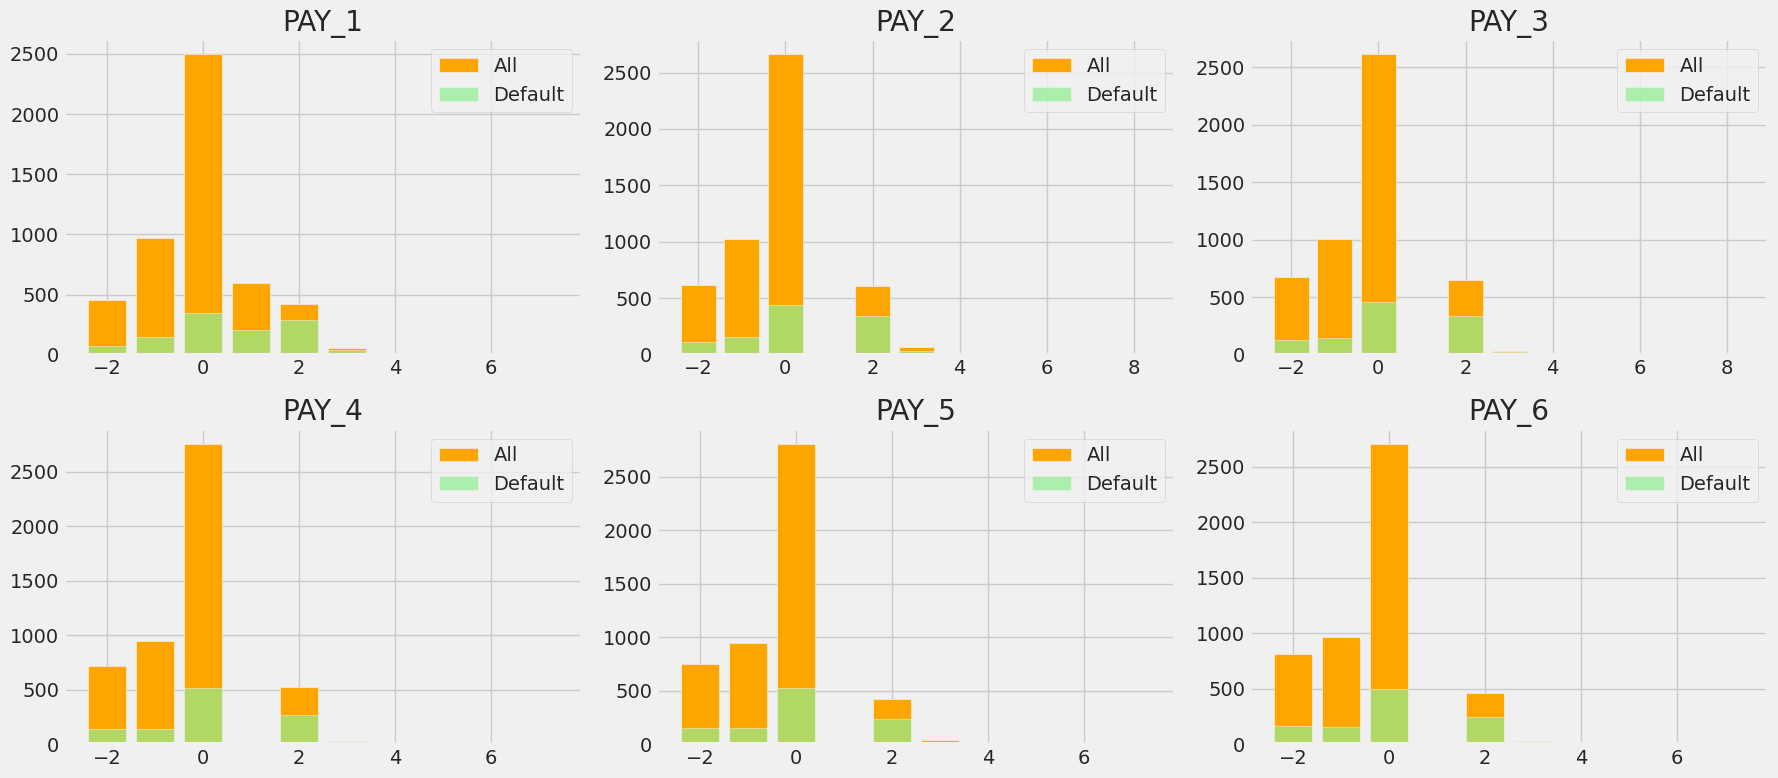

In [ ]:
import matplotlib.pyplot as plt

# Dummy function to simulate your getColumnsNames
def getColumnsNames(prefix):
    return [f'{prefix}{i}' for i in range(1, 7)]  # Assuming 6 PAY_ columns

# Assuming dataset is already defined
# dataset = pd.read_csv('path_to_your_data.csv')  # Load your actual dataset

pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2, 3)  # Ensure 2 rows, 3 columns grid
figure.set_size_inches(18, 8)

for i in range(len(pay_status_columns)):
    row, col = i // 3, i % 3

    # Simulating data for demonstration; replace with your actual data access
    d = dataset[pay_status_columns[i]].value_counts()
    x = dataset[pay_status_columns[i]][dataset['def_pay'] == 1].value_counts()

    ax[row, col].bar(d.index, d, align='center', color='orange', label='All')
    ax[row, col].bar(x.index, x, align='center', color='lightgreen', alpha=0.7, label='Default')
    ax[row, col].set_title(pay_status_columns[i])
    ax[row, col].legend()

plt.tight_layout()
plt.show()


#### **The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.**

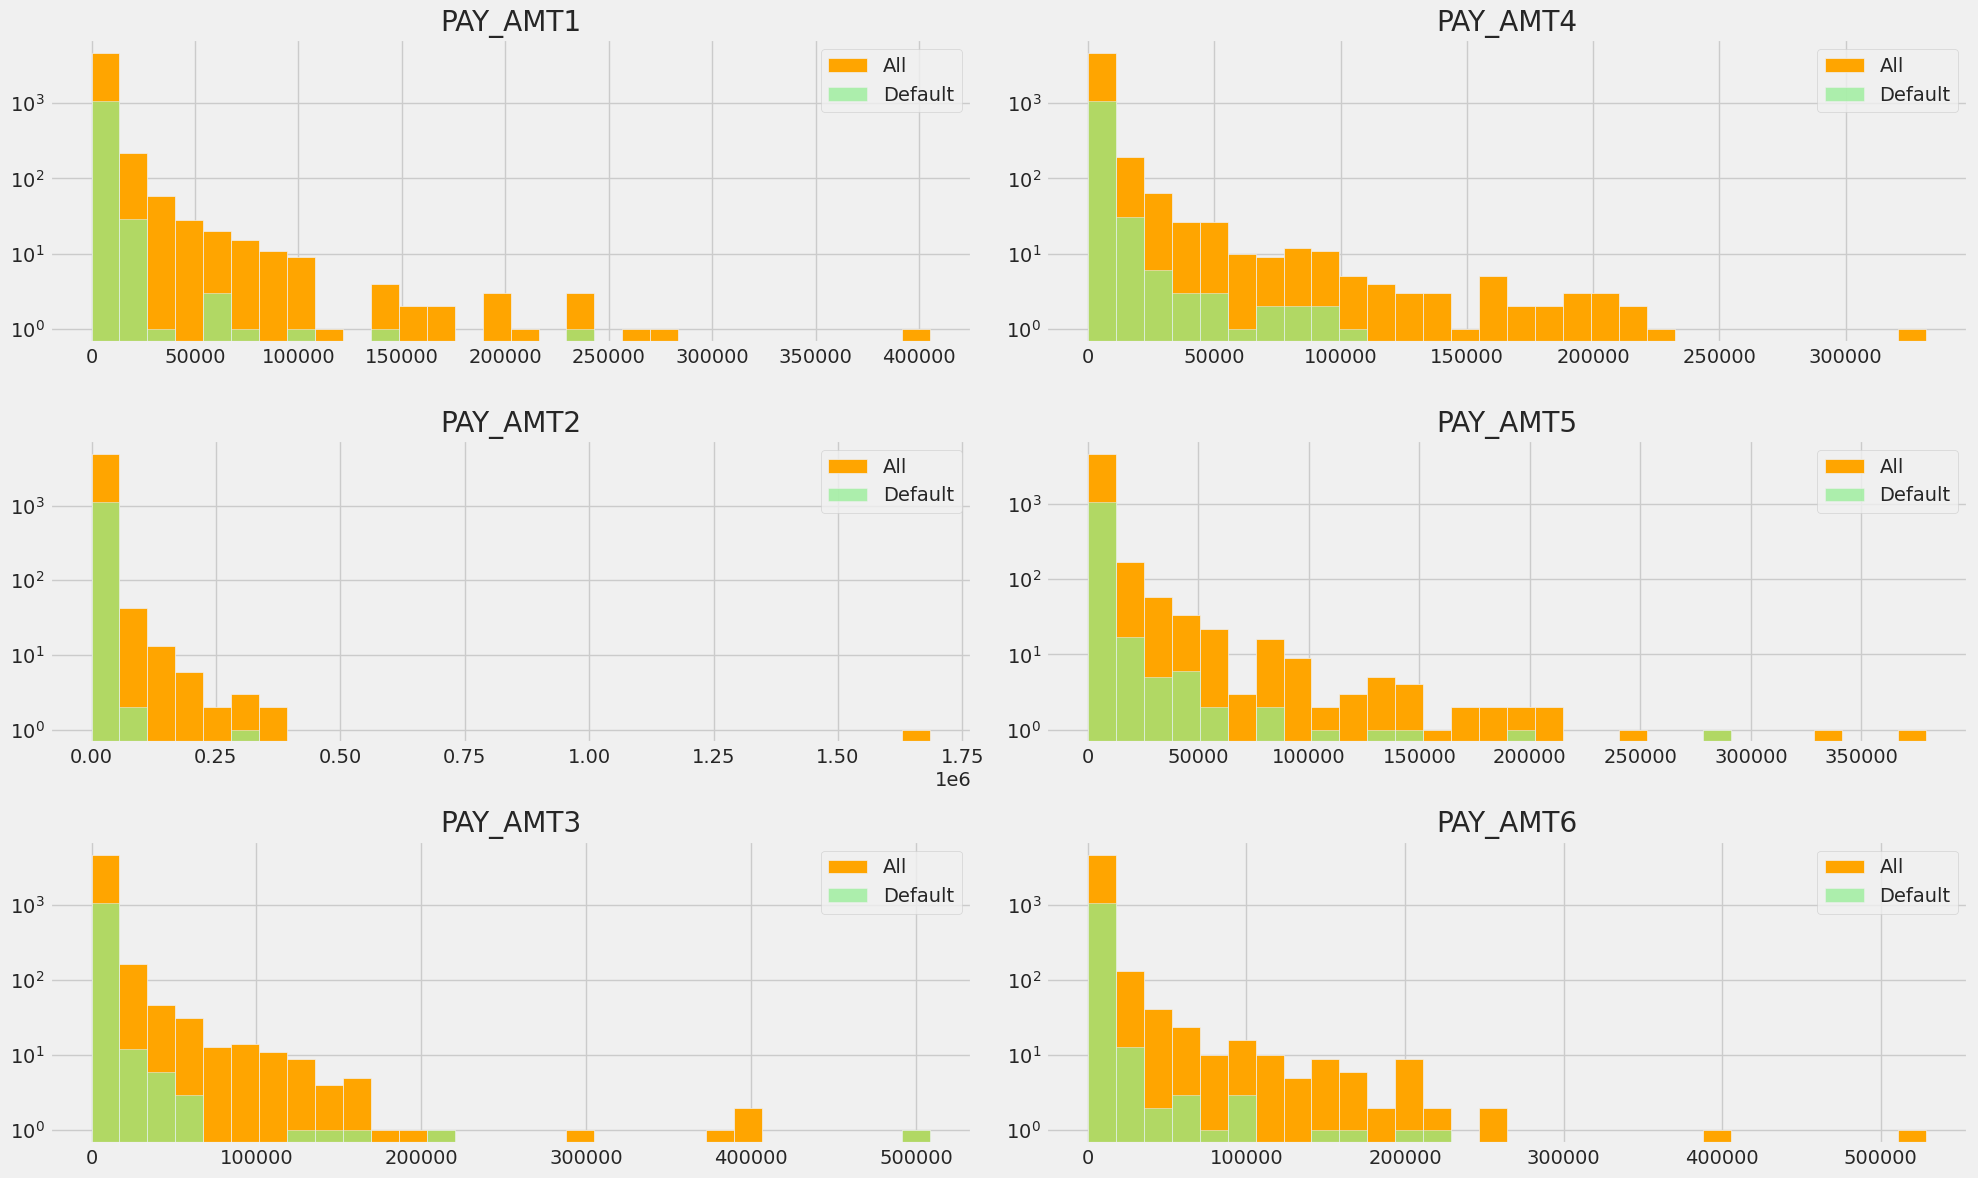

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming getColumnsNames is a function that extracts column names with a specific prefix
def getColumnsNames(prefix):
    # This is a placeholder for your actual function implementation
    return [col for col in dataset.columns if col.startswith(prefix)]

# Getting the column names for payment amounts
pay_amt_columns = getColumnsNames('PAY_AMT')

# Setting up the figure and axes
figure, ax = plt.subplots(3, 2)
figure.set_size_inches(20, 12)  # Increase the figure size to give more space

for i in range(len(pay_amt_columns)):
    row, col = i % 3, int(i / 3)

    # Plotting the full dataset histogram in skyblue
    n_bins = 30  # Set a fixed number of bins for consistency
    range_min = dataset[pay_amt_columns[i]].min()
    range_max = dataset[pay_amt_columns[i]].max()
    ax[row, col].hist(dataset[pay_amt_columns[i]], bins=n_bins, color='orange', label='All', range=(range_min, range_max))

    # Plotting the default cases histogram in salmon
    default_data = dataset[pay_amt_columns[i]][dataset['def_pay'] == 1]
    ax[row, col].hist(default_data, bins=n_bins, color='lightgreen', alpha=0.7, label='Default', range=(range_min, range_max))

    # Setting the title for each subplot
    ax[row, col].set_title(pay_amt_columns[i])

    # Adding logarithmic scaling to make the histogram more readable
    ax[row, col].set_yscale('log')

    # Adding legend to each subplot
    ax[row, col].legend()

# Adjusting layout to prevent overlap
plt.tight_layout()
# Display the plot
plt.show()


#### **The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters.**

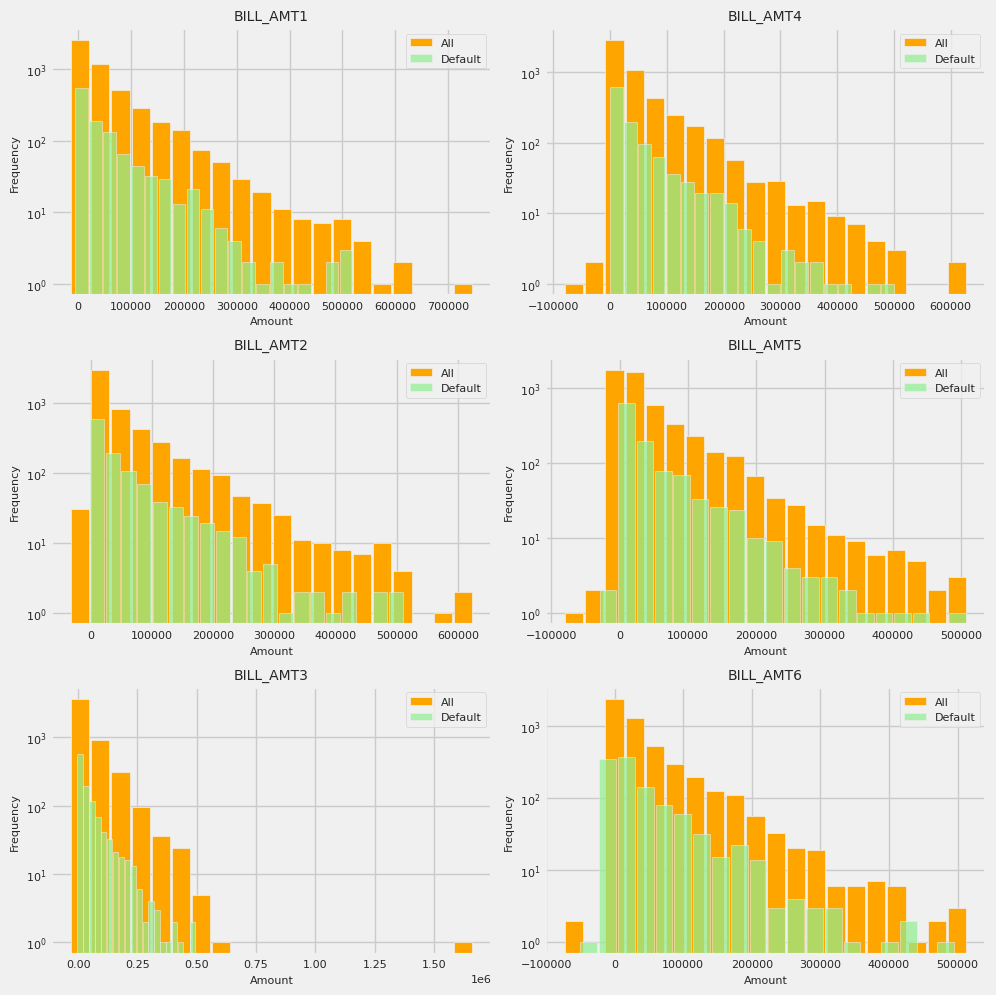

In [ ]:
import matplotlib.pyplot as plt

# Set the global font size and font family
plt.rcParams.update({'font.size': 8, 'font.family': 'sans-serif'})

# Assuming getColumnsNames is a function that returns a list of column names starting with a given prefix
def getColumnsNames(prefix):
    # This is a placeholder; you should use your actual implementation
    return [col for col in dataset.columns if col.startswith(prefix)]

# Retrieve the column names for BILL_AMT
bill_atm_columns = getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3, 2)
figure.set_size_inches(10, 10)

for i in range(len(bill_atm_columns)):
    row, col = i % 3, i // 3  # Correct the indexing for subplot assignment

    # Plot the histogram for all data
    ax[row, col].hist(dataset[bill_atm_columns[i]], bins=20, rwidth=0.9, color='orange', label='All')
    # Plot the histogram for default cases
    ax[row, col].hist(dataset[bill_atm_columns[i]][dataset['def_pay'] == 1], bins=20, rwidth=0.9, color='lightgreen', alpha=0.7, label='Default')

    # Set title with customized font
    ax[row, col].set_title(bill_atm_columns[i], fontdict={'fontsize': 10, 'fontweight': 'medium'})

    # Set axis labels with customized fonts
    ax[row, col].set_xlabel('Amount', fontdict={'fontsize': 8})
    ax[row, col].set_ylabel('Frequency', fontdict={'fontsize': 8})

    # Adding logarithmic scaling to make the histogram more readable
    ax[row, col].set_yscale('log')

    # Adding legend with a specific font size
    ax[row, col].legend(fontsize=8)

plt.tight_layout()
plt.show()


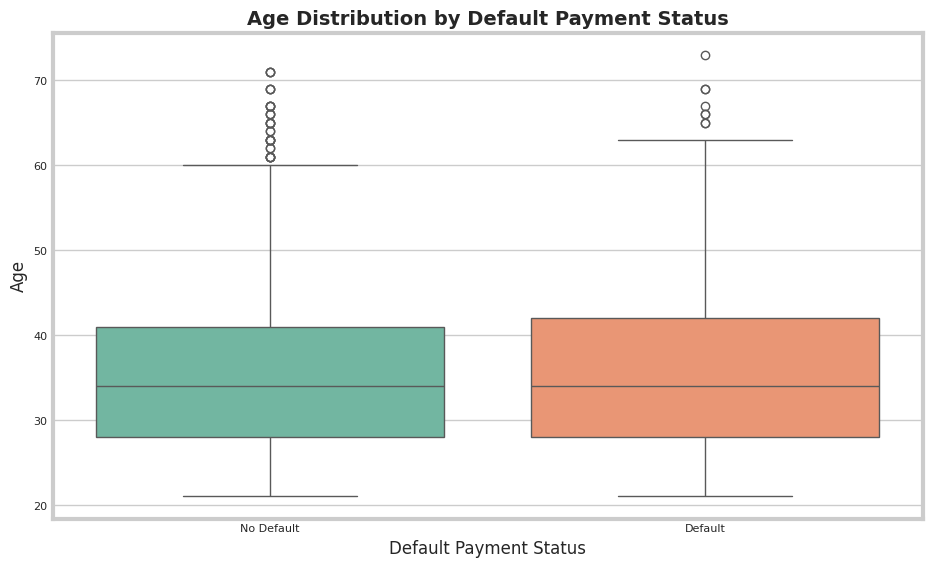

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the boxplot with a more subtle and professional color palette
palette_colors = 'Set2'  # This palette provides distinct colors that are visually appealing

plt.figure(figsize=(10, 6))  # Set a suitable figure size that fits your data
ax = sns.boxplot(x='def_pay', y='AGE', data=dataset, palette=palette_colors)

# Adding title and labels with more readability
ax.set_title('Age Distribution by Default Payment Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Default Payment Status', fontsize=12)
ax.set_ylabel('Age', fontsize=12)

# Customizing x-axis labels for clarity if needed
# If def_pay is binary, for example, you might want to rename the labels
labels = ['No Default', 'Default'] if dataset['def_pay'].nunique() == 2 else dataset['def_pay'].unique()
ax.set_xticklabels(labels)

plt.show()


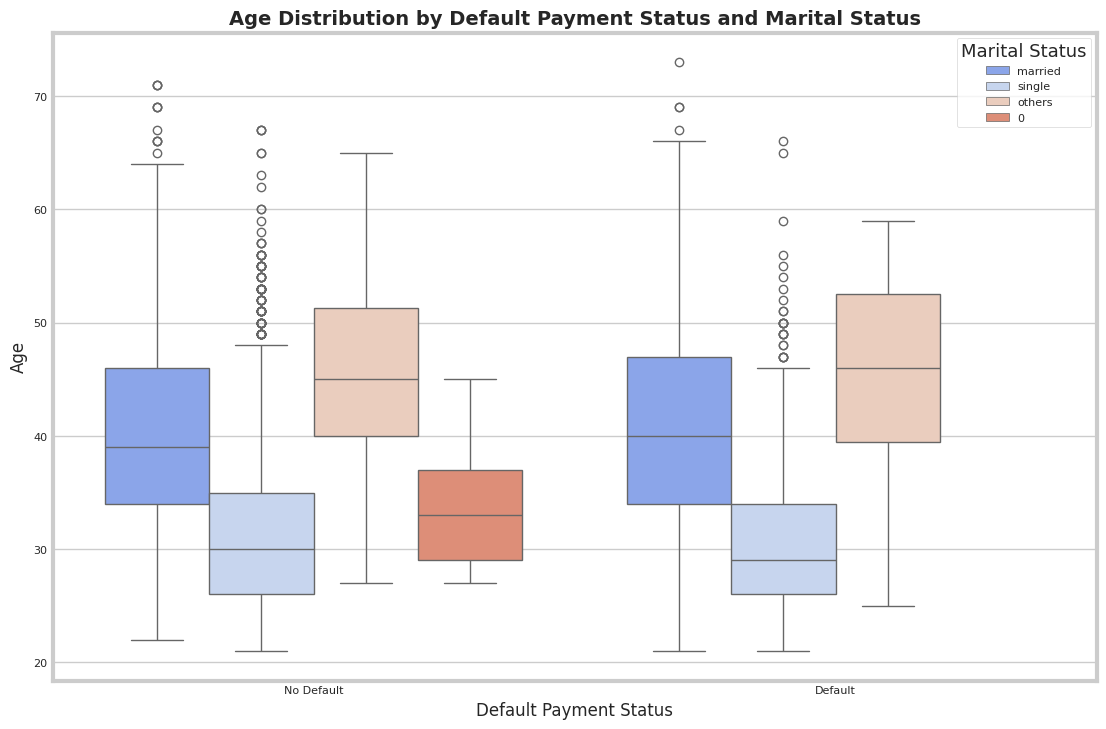

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the boxplot with a defined and suitable color palette
# "rainbow" is vivid, but for professional reports, consider a more subdued palette.
palette_colors = sns.color_palette("coolwarm", n_colors=dataset['MARRIAGE'].nunique())

plt.figure(figsize=(12, 8))  # Set a suitable figure size that fits your data
ax = sns.boxplot(x='def_pay', y='AGE', hue='MARRIAGE', data=dataset, palette=palette_colors)

# Adding title and labels with more readability
ax.set_title('Age Distribution by Default Payment Status and Marital Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Default Payment Status', fontsize=12)
ax.set_ylabel('Age', fontsize=12)

# Customizing legend for clarity
ax.legend(title='Marital Status', title_fontsize='13', loc='upper right')

# Customizing x-axis labels for clarity if needed
# Assuming def_pay is binary; adjust labels accordingly
labels = ['No Default', 'Default'] if dataset['def_pay'].nunique() == 2 else dataset['def_pay'].unique()
ax.set_xticklabels(labels)

plt.show()

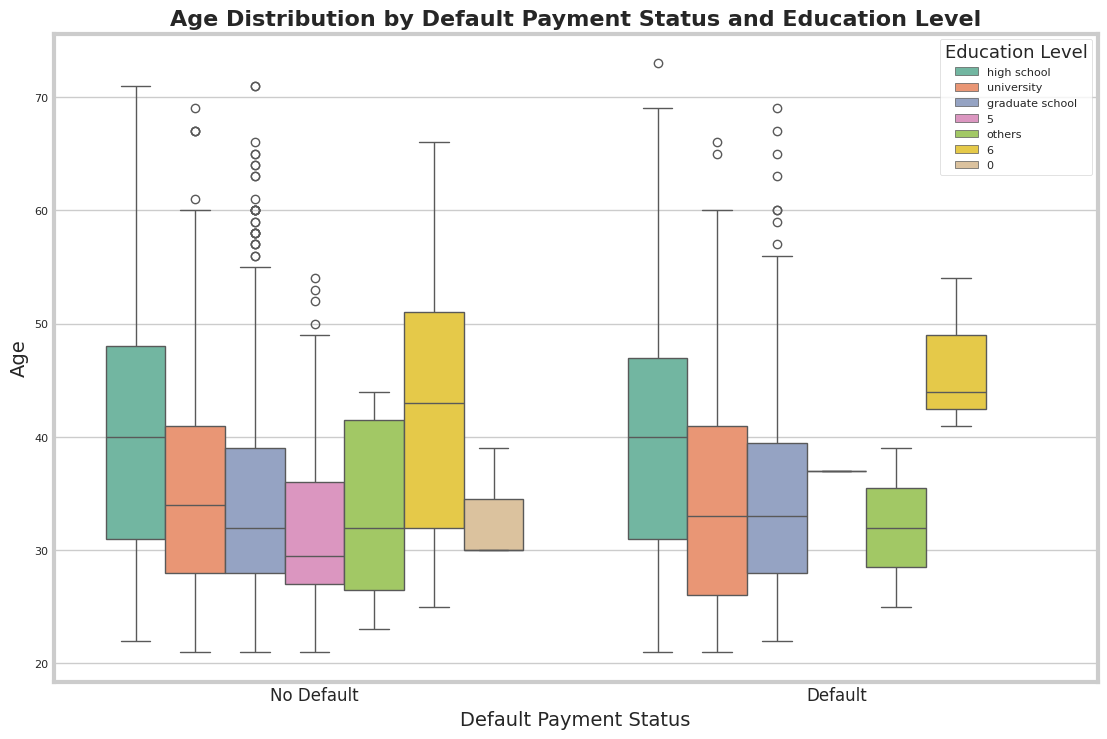

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Choose a more appropriate color palette
palette_colors = sns.color_palette("Set2")  # Provides distinct yet harmonious colors

plt.figure(figsize=(12, 8))  # Set a suitable figure size that fits your data
ax = sns.boxplot(x='def_pay', y='AGE', hue='EDUCATION', data=dataset, palette=palette_colors)

# Adding title and labels with more readability
ax.set_title('Age Distribution by Default Payment Status and Education Level', fontsize=16, fontweight='bold')
ax.set_xlabel('Default Payment Status', fontsize=14)
ax.set_ylabel('Age', fontsize=14)

# Customizing legend for clarity
ax.legend(title='Education Level', title_fontsize='13', loc='best')  # Change loc to 'best' to automatically find the optimal position

# Improve tick label readability
labels = ['No Default', 'Default'] if dataset['def_pay'].nunique() == 2 else dataset['def_pay'].unique()
ax.set_xticklabels(labels, fontsize=12)

plt.show()


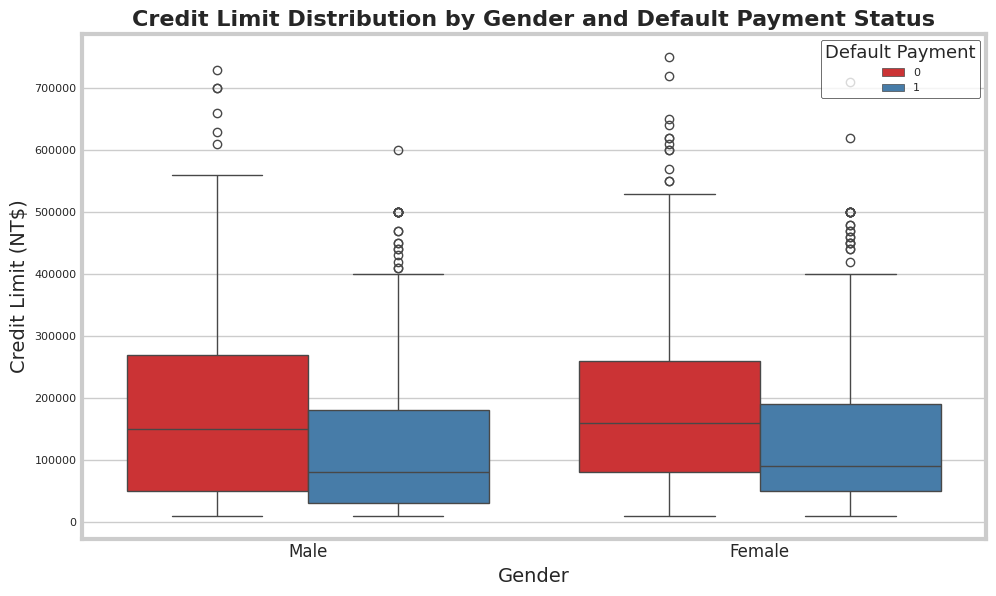

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Opt for a color palette that is visually appealing and professional
# "viridis" is a good alternative to "rainbow" for sequential data but using "Set1" for categorical distinction
palette_colors = sns.color_palette("Set1", n_colors=dataset['def_pay'].nunique())

plt.figure(figsize=(10, 6))  # Adjusting figure size for better visualization
ax = sns.boxplot(x='SEX', y='LIMIT_BAL', hue='def_pay', data=dataset, palette=palette_colors)

# Adding title and labels with readability enhancements
ax.set_title('Credit Limit Distribution by Gender and Default Payment Status', fontsize=16, fontweight='bold')
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Credit Limit (NT$)', fontsize=14)

# Customizing legend for clarity
legend = ax.legend(title='Default Payment', title_fontsize='13', loc='upper right')
legend.get_frame().set_facecolor('white')  # Set legend background to white
legend.get_frame().set_edgecolor('black')  # Adding border to the legend

# Customizing x-axis labels for clarity if necessary
gender_labels = ['Male', 'Female'] if dataset['SEX'].nunique() == 2 else dataset['SEX'].unique()
ax.set_xticklabels(gender_labels, fontsize=12)

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

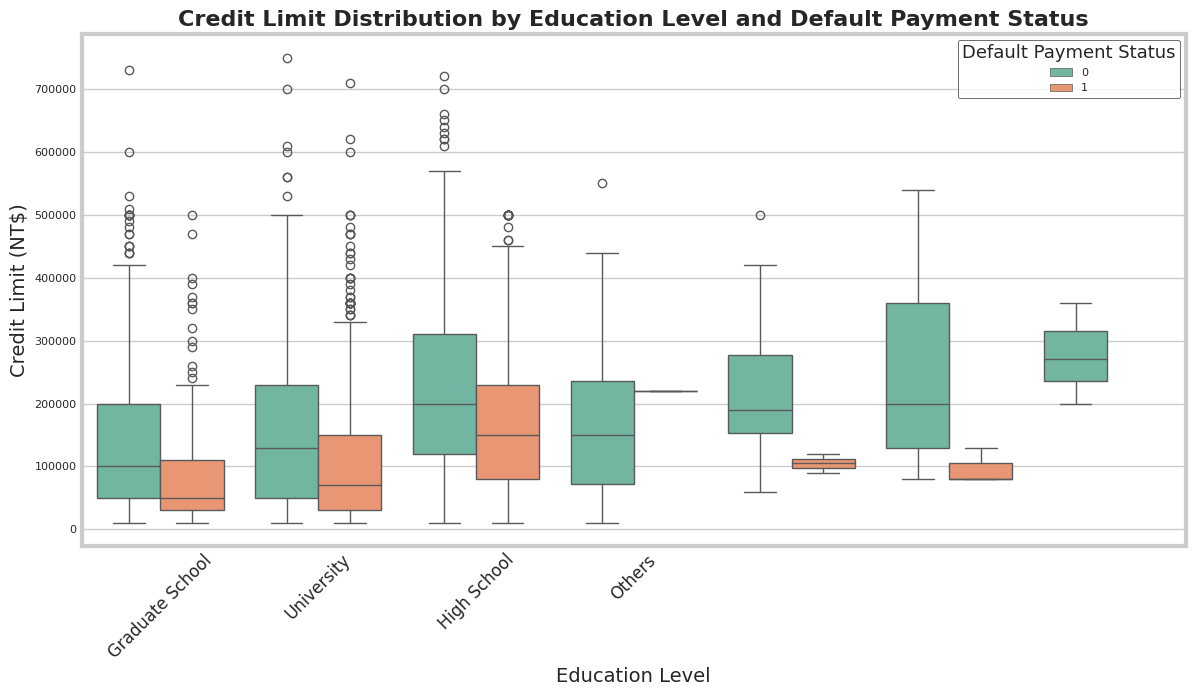

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Choose a more appropriate and professionally suitable color palette
palette_colors = sns.color_palette("Set2", n_colors=dataset['def_pay'].nunique())

plt.figure(figsize=(12, 7))  # Set a suitable figure size that fits your data
ax = sns.boxplot(x='EDUCATION', y='LIMIT_BAL', hue='def_pay', data=dataset, palette=palette_colors)

# Adding title and labels with more readability
ax.set_title('Credit Limit Distribution by Education Level and Default Payment Status', fontsize=16, fontweight='bold')
ax.set_xlabel('Education Level', fontsize=14)
ax.set_ylabel('Credit Limit (NT$)', fontsize=14)

# Customizing legend for clarity
legend = ax.legend(title='Default Payment Status', title_fontsize='13', loc='upper right')
legend.get_frame().set_facecolor('white')  # Set legend background to white
legend.get_frame().set_edgecolor('black')  # Adding border to the legend

# Improving x-axis labels for better readability
education_labels = ['Graduate School', 'University', 'High School', 'Others']
ax.set_xticklabels(education_labels, fontsize=12, rotation=45)  # Adjust rotation if labels overlap

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


<Axes: xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

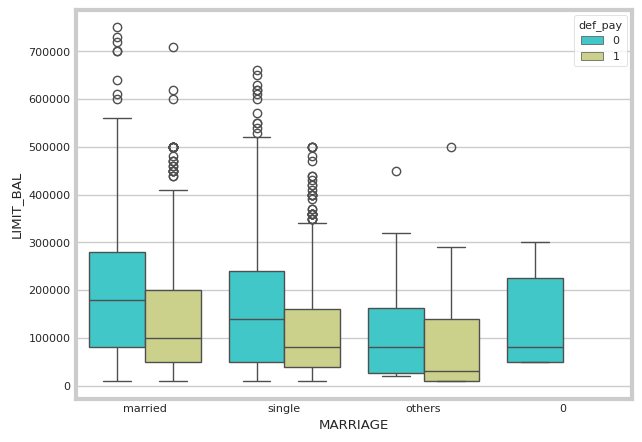

In [ ]:
sns.boxplot(x='MARRIAGE',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")

<Axes: xlabel='LIMIT_BAL', ylabel='Density'>

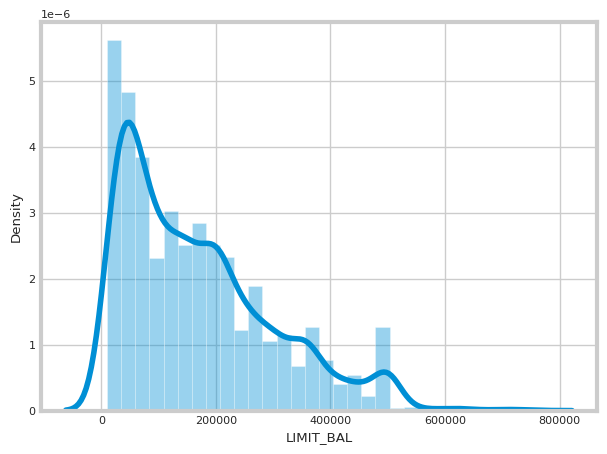

In [ ]:
sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=30)

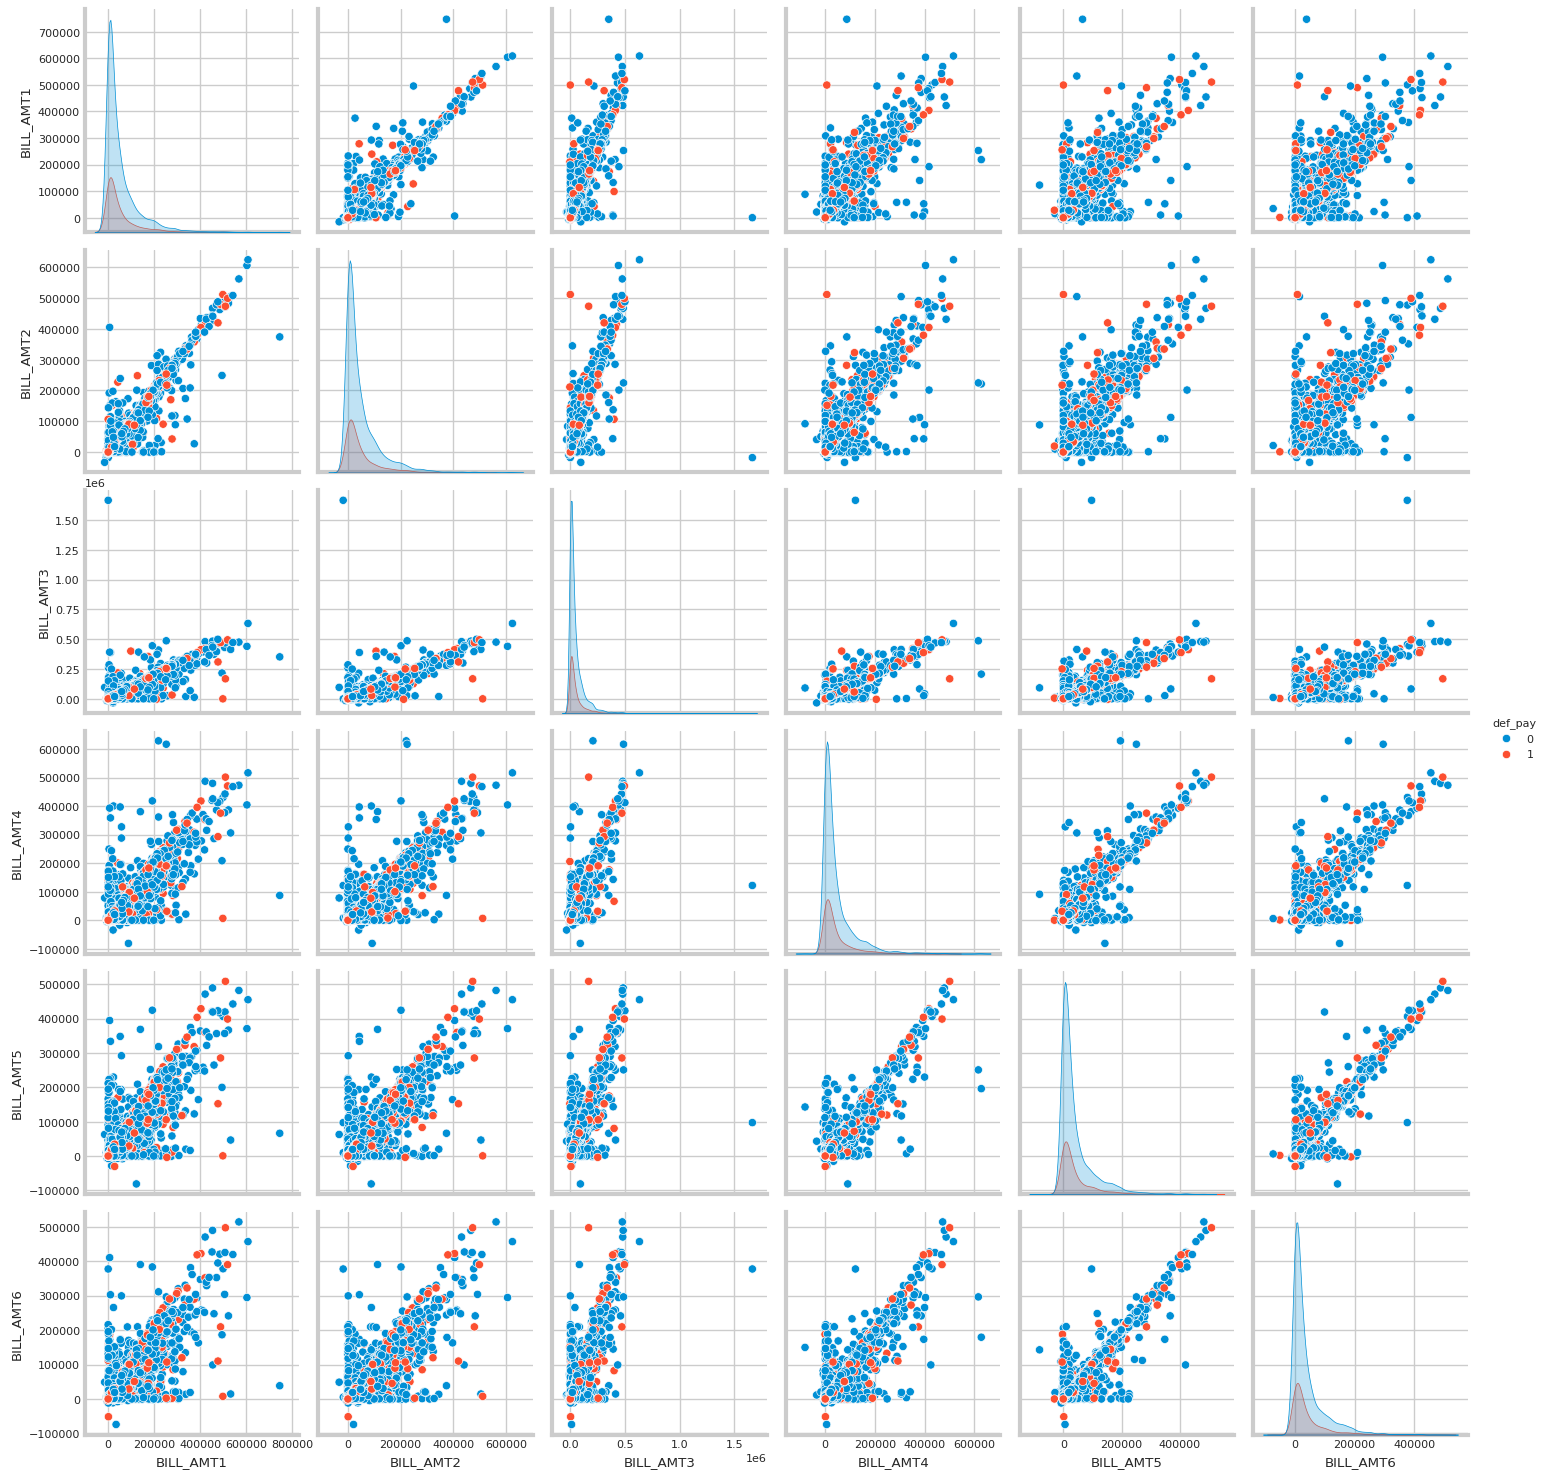

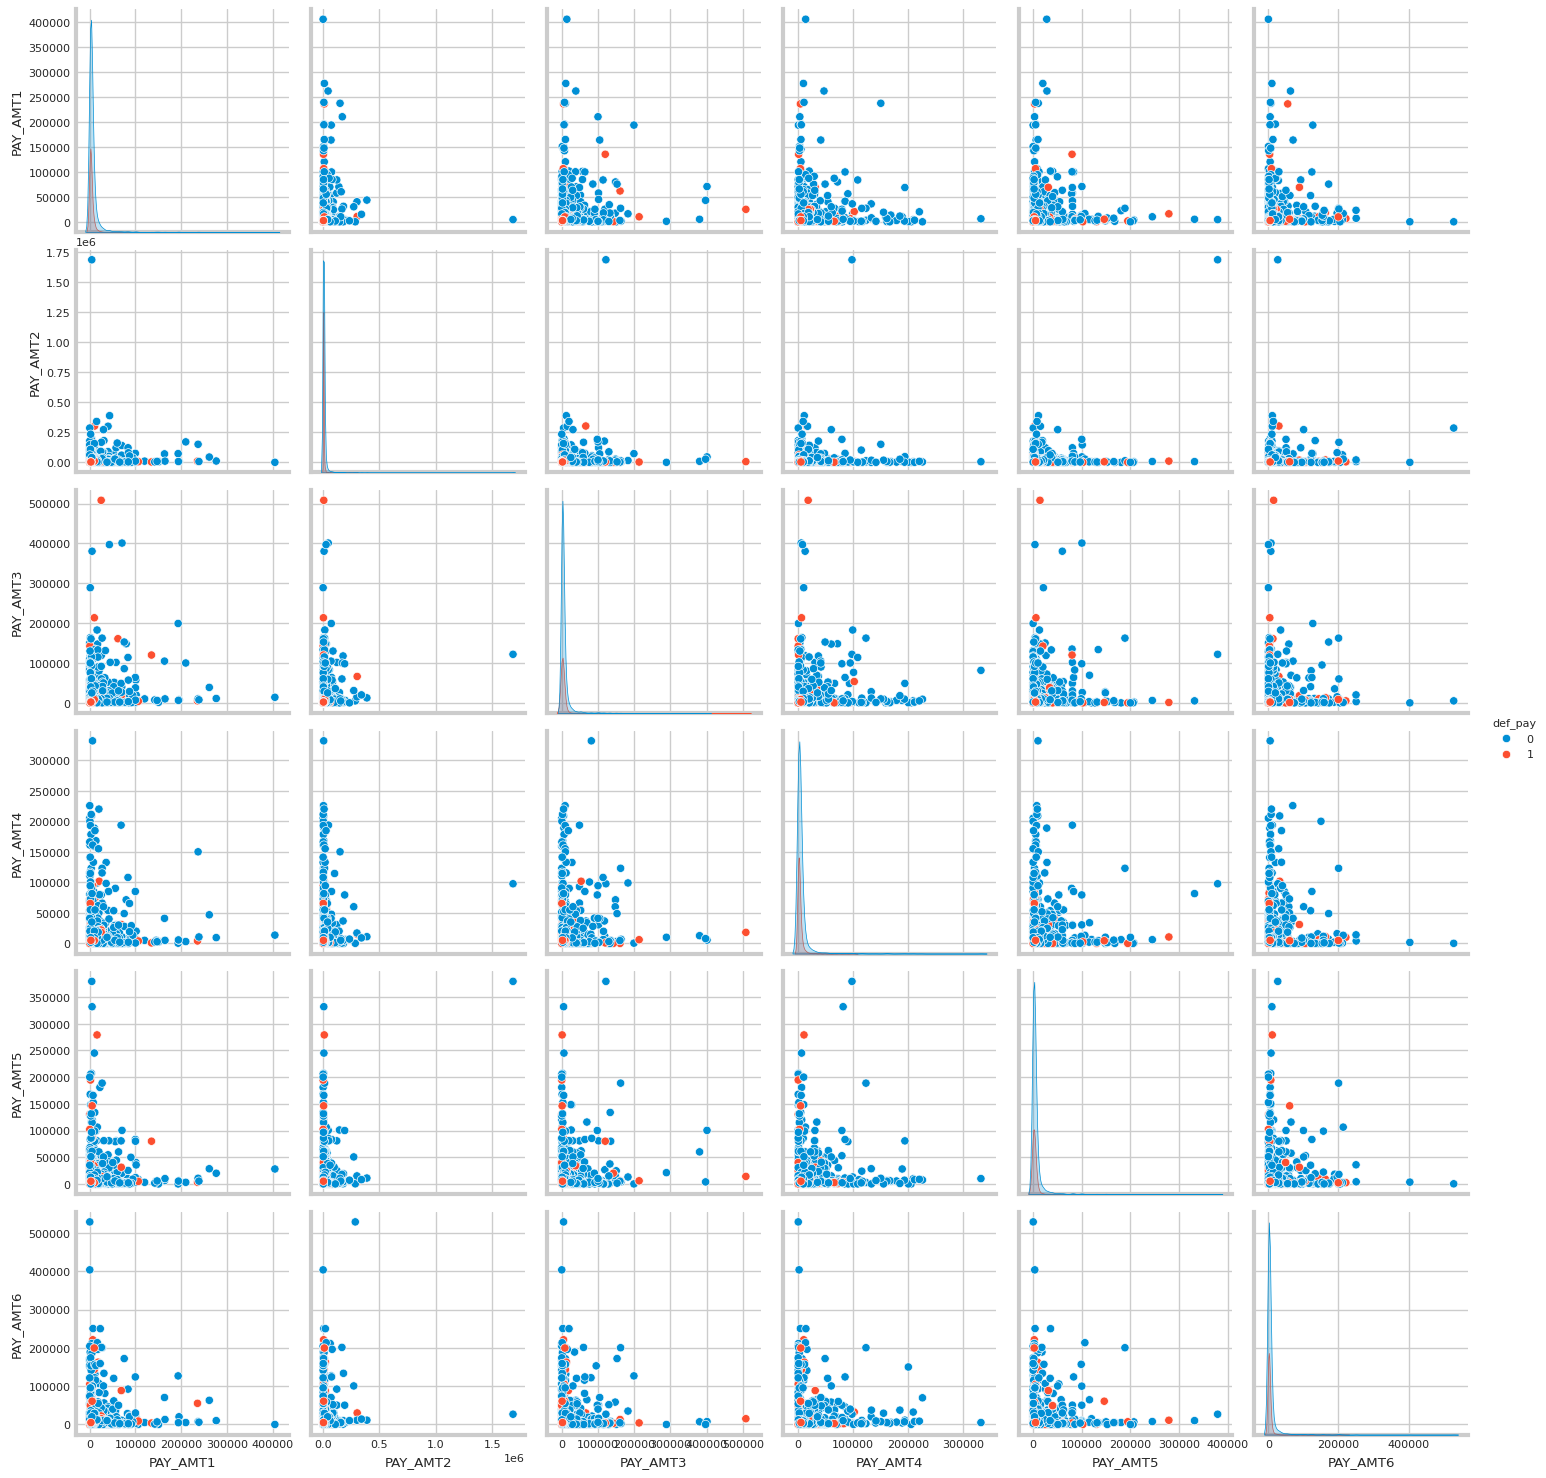

In [ ]:
# plot columns with similar names to check the correlation

sns.pairplot(dataset, vars=dataset.columns[11:17], kind='scatter',hue= 'def_pay')
sns.pairplot(dataset, vars=dataset.columns[17:23],hue = 'def_pay')

### **3.Observing correlation between features of the dataset**

In [ ]:
import pandas as pd

# Assuming 'dataset' is your DataFrame
# Select only numeric columns for correlation computation
numeric_dataset = dataset.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation = numeric_dataset.corr()


<Axes: >

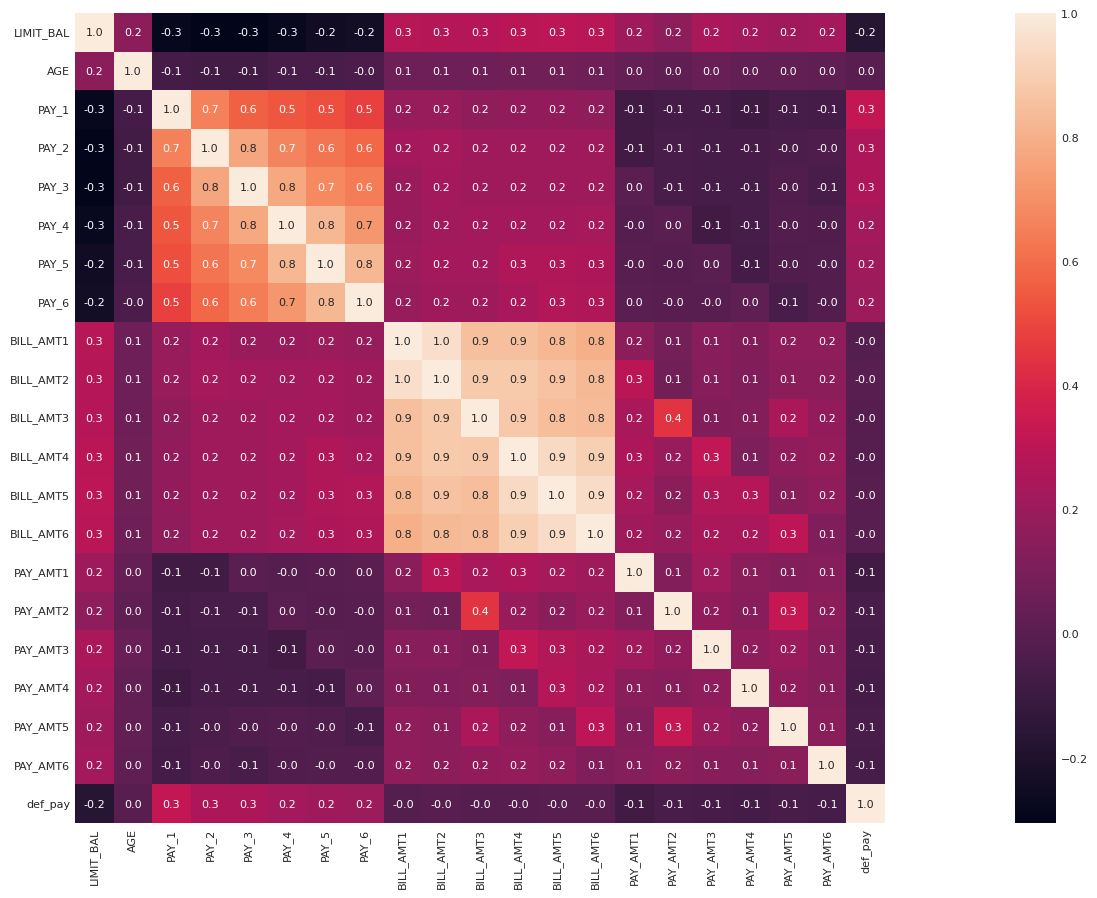

In [ ]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

#### **So it looks like the pay_0,pay_x variables are the strongest predictores of default, followed by the limit_bal and pay_amt_x variables.**

<Axes: title={'center': 'Correlation with Default'}>

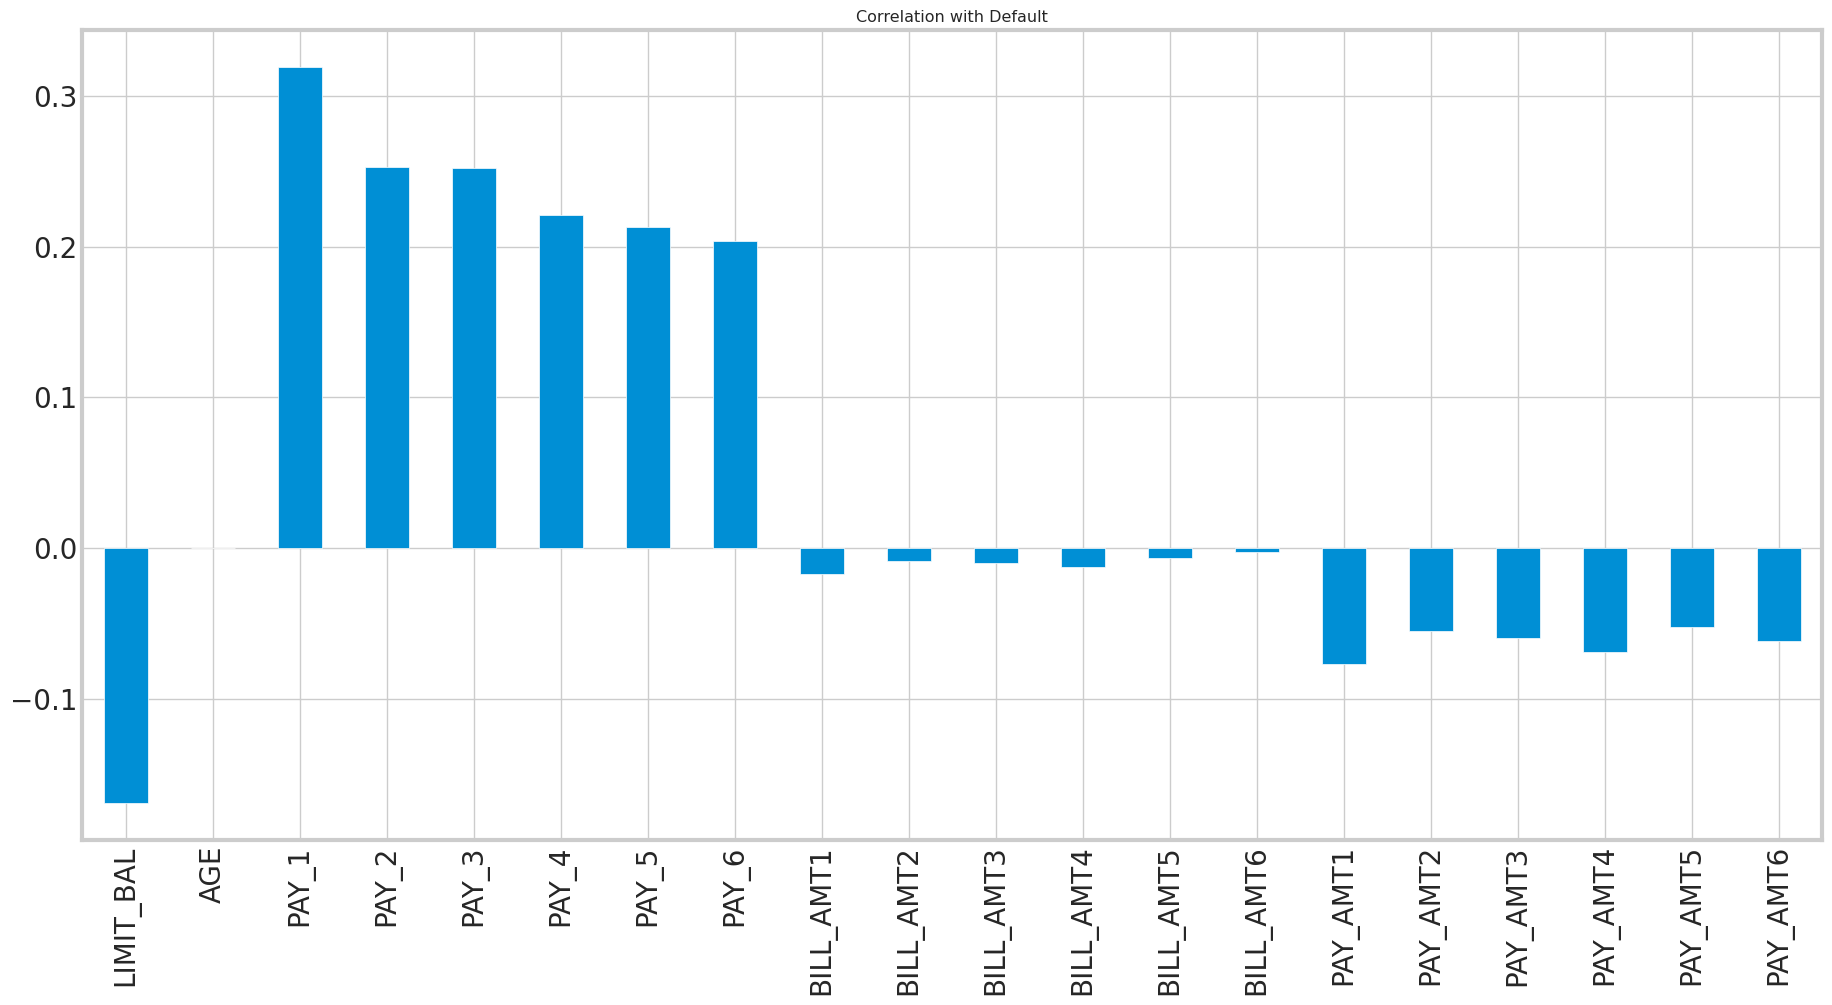

In [ ]:

X = dataset.drop(['def_pay','SEX','EDUCATION','MARRIAGE'],axis=1)
X.corrwith(dataset['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default",
                                        fontsize = 20,rot = 90, grid = True)

#### **It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is vert important feature for prediction. Id is unimportant and it has no rele in prediction so we will remove it later.**

### **FACEGRID**

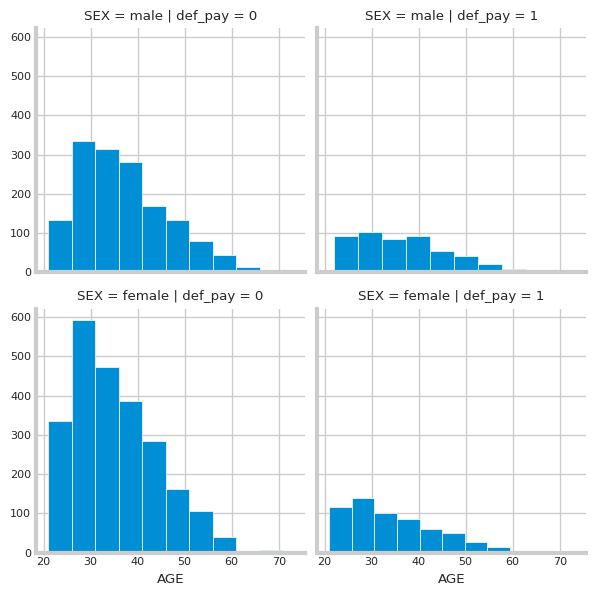

In [ ]:
g = sns.FacetGrid(dataset, col = 'def_pay', row = 'SEX')
g.map(plt.hist, 'AGE')


#### **From the above facegrid plot we can see that non-defaults have a higher proportion of people 30-40yrs.**

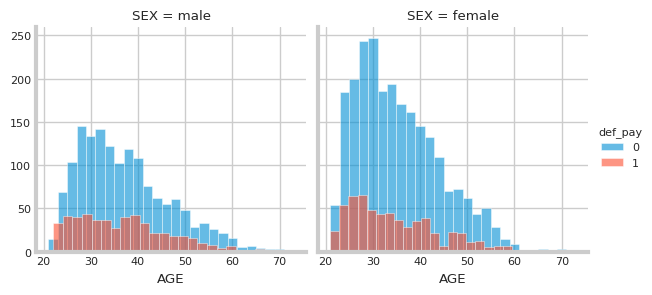

In [ ]:
g = sns.FacetGrid(dataset, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

### 4.Data Cleaning
**EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.**

**MARRIAGE has a label 0 that is undocumented**

**Data Transformation**

**The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).**

**The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)**

**Thus is a good occasion to learn how to use the .loc function**

In [ ]:
fil = (dataset.EDUCATION == '5') | (dataset.EDUCATION == '6') | (dataset.EDUCATION == '0')
dataset.loc[fil, 'EDUCATION'] = 'others'
dataset.EDUCATION.value_counts()

EDUCATION
university         2336
graduate school    1772
high school         808
others               84
Name: count, dtype: int64

In [ ]:
dataset['EDUCATION'].value_counts(dropna = False)

EDUCATION
university         2336
graduate school    1772
high school         808
others               84
Name: count, dtype: int64

In [ ]:
dataset.loc[dataset.MARRIAGE == '0', 'MARRIAGE'] = 'others'
dataset.MARRIAGE.value_counts()

MARRIAGE
single     2649
married    2289
others       62
Name: count, dtype: int64

In [ ]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,male,high school,married,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,female,high school,married,49,-1,-1,-2,-1,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,male,university,married,28,-1,-1,-1,0,-1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,female,high school,married,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,male,graduate school,single,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [ ]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
6133,360000,male,university,married,57,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
5643,80000,female,university,single,41,-1,2,2,2,2,...,69465,70545,72233,3000,2500,3000,2500,3000,0,0
8778,70000,female,graduate school,single,24,-1,0,0,0,0,...,20011,19147,19056,2000,3000,3000,2000,2000,3668,0
23490,140000,female,university,single,33,0,0,0,0,0,...,62253,69594,68262,2137,2300,2278,9300,0,3000,0
7451,150000,female,high school,single,32,0,0,0,0,0,...,77078,66927,50881,2500,3000,2000,5000,5055,5000,1


In [ ]:
fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
dataset.PAY_1.value_counts()
fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
dataset.PAY_2.value_counts()
fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
dataset.PAY_3.value_counts()
fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
dataset.PAY_4.value_counts()
fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
dataset.PAY_5.value_counts()
fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
dataset.PAY_6.value_counts()


PAY_6
0    4482
2     463
3      26
4      12
7      11
5       4
6       2
Name: count, dtype: int64

In [ ]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,male,high school,married,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,female,high school,married,49,0,0,0,0,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,male,university,married,28,0,0,0,0,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,female,high school,married,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,male,graduate school,single,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [ ]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
6133,360000,male,university,married,57,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5643,80000,female,university,single,41,0,2,2,2,2,...,69465,70545,72233,3000,2500,3000,2500,3000,0,0
8778,70000,female,graduate school,single,24,0,0,0,0,0,...,20011,19147,19056,2000,3000,3000,2000,2000,3668,0
23490,140000,female,university,single,33,0,0,0,0,0,...,62253,69594,68262,2137,2300,2278,9300,0,3000,0
7451,150000,female,high school,single,32,0,0,0,0,0,...,77078,66927,50881,2500,3000,2000,5000,5055,5000,1


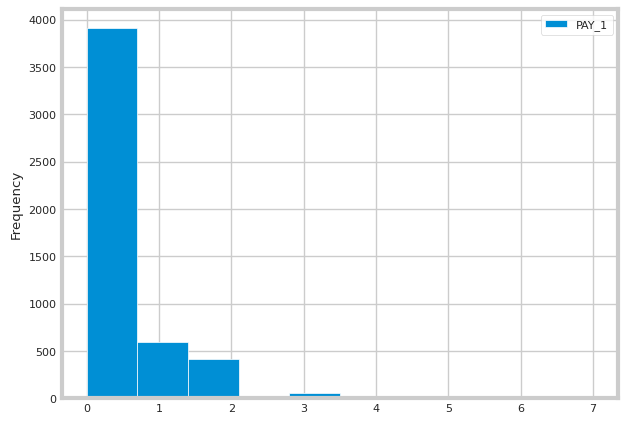

In [ ]:

dataset.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [ ]:
dataset['PAY_1'].describe()

count    5000.00000
mean        0.33540
std         0.71959
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         7.00000
Name: PAY_1, dtype: float64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 10748 to 7451
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  5000 non-null   int64 
 1   SEX        5000 non-null   object
 2   EDUCATION  5000 non-null   object
 3   MARRIAGE   5000 non-null   object
 4   AGE        5000 non-null   int64 
 5   PAY_1      5000 non-null   int64 
 6   PAY_2      5000 non-null   int64 
 7   PAY_3      5000 non-null   int64 
 8   PAY_4      5000 non-null   int64 
 9   PAY_5      5000 non-null   int64 
 10  PAY_6      5000 non-null   int64 
 11  BILL_AMT1  5000 non-null   int64 
 12  BILL_AMT2  5000 non-null   int64 
 13  BILL_AMT3  5000 non-null   int64 
 14  BILL_AMT4  5000 non-null   int64 
 15  BILL_AMT5  5000 non-null   int64 
 16  BILL_AMT6  5000 non-null   int64 
 17  PAY_AMT1   5000 non-null   int64 
 18  PAY_AMT2   5000 non-null   int64 
 19  PAY_AMT3   5000 non-null   int64 
 20  PAY_AMT4   5000 non-null   int6

In [ ]:
dataset.SEX.nunique()

2

In [ ]:
dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,5000.0000,5.000000e+03,5000.000000,5000.00000,5000.000000,5000.000000
mean,5712.7126,6.168286e+03,5847.442000,5219.85440,5081.839800,5716.655000
std,15974.2450,2.945517e+04,19111.264928,16468.05314,16284.349383,20330.666372
min,0.0000,0.000000e+00,0.000000,0.00000,0.000000,0.000000
25%,1000.0000,7.997500e+02,396.000000,316.00000,278.500000,169.250000
50%,2089.0000,2.011500e+03,1811.500000,1520.00000,1500.000000,1490.000000
75%,5000.0000,5.000000e+03,5000.000000,4137.75000,4200.000000,4000.000000
max,405016.0000,1.684259e+06,508229.000000,331788.00000,379267.000000,528666.000000


In [ ]:
dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,51286.271400,49120.037800,4.711428e+04,43592.987800,40624.531600,39100.713400
std,74472.533245,71714.254732,7.282651e+04,65300.378231,61031.613035,59561.490754
min,-15308.000000,-33350.000000,-3.404100e+04,-81334.000000,-81334.000000,-73895.000000
25%,3651.250000,2917.000000,2.778000e+03,2485.750000,1745.000000,1244.500000
50%,22380.000000,20887.000000,1.984800e+04,19191.500000,18201.500000,17079.000000
75%,66651.500000,64292.750000,5.909100e+04,52586.750000,50074.250000,48956.000000
max,746814.000000,624475.000000,1.664089e+06,628699.000000,508213.000000,513798.000000


In [ ]:

dataset.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

#### One hot encoding for categorical variable

In [ ]:
dataset.shape


(5000, 24)

In [ ]:
dataset.columns = dataset.columns.map(str.lower)

In [ ]:
dataset.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,male,high school,married,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,female,high school,married,49,0,0,0,0,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,male,university,married,28,0,0,0,0,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,female,high school,married,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,male,graduate school,single,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


### 5.Feature Scaling of numerical attributes

In [ ]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
dataset[col_to_norm] = dataset[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [ ]:
dataset.head(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,1.069816,male,high school,married,-0.384536,0,0,0,0,0,...,0.624561,0.281103,-0.418730,0.161669,-0.005714,-0.096677,-0.134811,-0.250685,-0.182829,0
12574,-1.211339,female,high school,married,1.448744,0,0,0,0,2,...,-0.641760,-0.647050,-0.640926,-0.357656,-0.209434,-0.158009,-0.317000,-0.300923,-0.281212,1
29677,-0.907185,male,university,married,-0.815896,0,0,0,0,0,...,0.036481,-0.644395,0.082046,-0.357656,1.361144,-0.190872,-0.238052,2.389353,-0.213032,0
8857,-0.679069,female,high school,married,1.772264,2,2,3,3,3,...,-0.043572,-0.013249,0.025292,-0.126010,-0.155108,-0.222270,-0.317000,-0.213836,-0.202505,1
21099,0.765662,male,graduate school,single,-0.168856,1,2,0,0,2,...,-0.323843,-0.411869,-0.365335,-0.357656,-0.073620,-0.201338,-0.317000,-0.189271,-0.182829,0
17459,-0.222838,female,high school,married,-0.600216,0,0,0,0,2,...,0.591695,0.399431,0.365160,-0.063403,-0.056474,0.369377,-0.317000,-0.176373,-0.168071,0
1477,0.233393,male,university,single,-1.031576,0,0,0,0,0,...,-0.422337,-0.459013,-0.545721,0.453543,-0.077559,-0.043824,-0.274489,-0.289991,-0.196947,0
5121,-0.146800,male,university,single,0.154664,0,0,0,0,0,...,0.326968,0.347043,0.333912,-0.201138,-0.124550,-0.108190,-0.183395,-0.189271,-0.182829,0
18339,-1.135300,female,university,single,-1.462936,0,0,0,0,0,...,-0.365838,-0.340948,-0.320620,-0.169835,-0.107540,-0.149008,-0.195541,-0.250563,-0.242695,0


In [ ]:
dataset.tail(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
28420,-0.679069,female,graduate school,single,-0.708056,0,0,0,0,0,...,-0.407894,-0.374393,-0.353598,-0.263745,-0.155108,-0.237969,-0.250198,-0.269110,-0.246778,1
3972,0.917739,male,high school,married,1.233064,2,0,0,0,0,...,-0.187200,-0.731572,1.144113,-0.036482,-0.051653,-0.256337,-0.050336,8.667726,2.704035,1
13134,0.689623,female,university,single,0.586024,0,0,0,0,0,...,2.248895,1.062531,-0.617721,0.251197,0.151049,0.141688,-0.030235,-0.180304,9.531794,1
28606,-1.059262,female,university,married,0.693864,0,0,0,0,0,...,-0.272996,-0.232928,-0.187064,-0.251224,-0.149846,-0.227503,-0.256271,-0.194859,-0.232020,0
8980,0.157354,female,university,married,-0.168856,0,0,0,0,0,...,0.637503,1.180612,0.623339,-0.075924,1.148698,1.002261,1.808539,-0.134181,0.702622,0
6133,1.450008,male,university,married,2.311464,1,0,0,0,0,...,-0.667643,-0.665698,-0.656542,-0.357656,-0.209434,-0.305999,-0.317000,-0.312100,-0.281212,1
5643,-0.679069,female,university,single,0.586024,0,2,2,2,2,...,0.396240,0.490294,0.556326,-0.169835,-0.124550,-0.149008,-0.165176,-0.127856,-0.281212,0
8778,-0.755108,female,graduate school,single,-1.247256,0,0,0,0,0,...,-0.361167,-0.351944,-0.336572,-0.232442,-0.107574,-0.149008,-0.195541,-0.189271,-0.100777,0
23490,-0.222838,female,university,single,-0.276696,0,0,0,0,0,...,0.285785,0.474711,0.489649,-0.223865,-0.131341,-0.186790,0.247786,-0.312100,-0.133637,0


In [ ]:
education_mapping = {
    'graduate school': 1,
    'university': 2,
    'high school': 3,
    'others': 4
}
dataset['education'] = dataset['education'].map(education_mapping)

# Map the 'marriage' column
marriage_mapping = {
    'married': 1,
    'single': 2,
    'others': 3
}
dataset['marriage'] = dataset['marriage'].map(marriage_mapping)

# Map the 'sex' column
sex_mapping = {
    'male': 1,
    'female': 2,
    'others': 3
}
dataset['sex'] = dataset['sex'].map(sex_mapping)

# Ensure all mapped columns are of integer type
dataset['education'] = dataset['education'].astype(int)
dataset['marriage'] = dataset['marriage'].astype(int)
dataset['sex'] = dataset['sex'].astype(int)

dataset

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,1.069816,1,3,1,-0.384536,0,0,0,0,0,...,0.624561,0.281103,-0.418730,0.161669,-0.005714,-0.096677,-0.134811,-0.250685,-0.182829,0
12574,-1.211339,2,3,1,1.448744,0,0,0,0,2,...,-0.641760,-0.647050,-0.640926,-0.357656,-0.209434,-0.158009,-0.317000,-0.300923,-0.281212,1
29677,-0.907185,1,2,1,-0.815896,0,0,0,0,0,...,0.036481,-0.644395,0.082046,-0.357656,1.361144,-0.190872,-0.238052,2.389353,-0.213032,0
8857,-0.679069,2,3,1,1.772264,2,2,3,3,3,...,-0.043572,-0.013249,0.025292,-0.126010,-0.155108,-0.222270,-0.317000,-0.213836,-0.202505,1
21099,0.765662,1,1,2,-0.168856,1,2,0,0,2,...,-0.323843,-0.411869,-0.365335,-0.357656,-0.073620,-0.201338,-0.317000,-0.189271,-0.182829,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,1.450008,1,2,1,2.311464,1,0,0,0,0,...,-0.667643,-0.665698,-0.656542,-0.357656,-0.209434,-0.305999,-0.317000,-0.312100,-0.281212,1
5643,-0.679069,2,2,2,0.586024,0,2,2,2,2,...,0.396240,0.490294,0.556326,-0.169835,-0.124550,-0.149008,-0.165176,-0.127856,-0.281212,0
8778,-0.755108,2,1,2,-1.247256,0,0,0,0,0,...,-0.361167,-0.351944,-0.336572,-0.232442,-0.107574,-0.149008,-0.195541,-0.189271,-0.100777,0


In [ ]:
dataset.isnull().sum()

limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_1        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
def_pay      0
dtype: int64

#### 6.Spilling Dataset into training(80%) and test set(20%)

1.   List item
2.   List item



In [ ]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'dataset' is your DataFrame
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
X_train.shape

(4000, 23)

In [ ]:
X_test.shape

(1000, 23)

# 7. Applying machine Learning algorithm for classification problem

## Logistic regression
In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.833,0.666667,0.346535,0.456026,0.651338


#### **Stochastic Gradient Descent**
stochastic Gradient Descent (SDG) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss function such as(linear) support vector machines and Logistic Regression. It is on of the gradient Descent Algorithm. It uses only a single example (a batch size of 1) per iteration . Given enough iterations, SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random.

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', penalty='l1', random_state=1)

In [ ]:
y_pred = sgd.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent,0.825,0.601504,0.39604,0.477612,0.664812


### K-nearest Neighbour
KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

We can implement a KNN model by following the below steps:

   * Load the data
   * Initialise the value of k
   * For getting the predicted class, iterate from 1 to total number of training data points
   * Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
   * Sort the calculated distances in ascending order based on distance values
   * Get top k rows from the sorted array
   * Get the most frequent class of these rows
   * Return the predicted class
   

Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

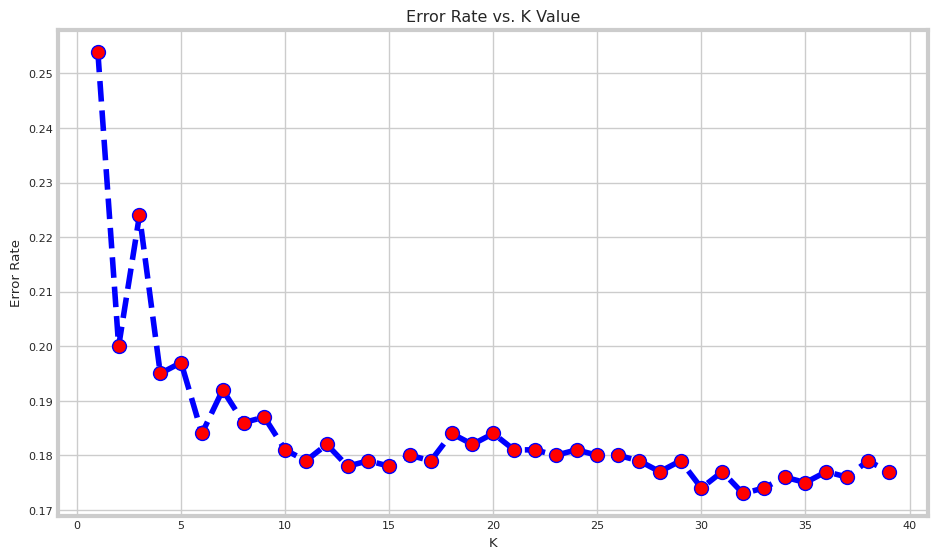

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)


In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.808,0.540984,0.326733,0.407407,0.628279


# Support Vector Machine
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

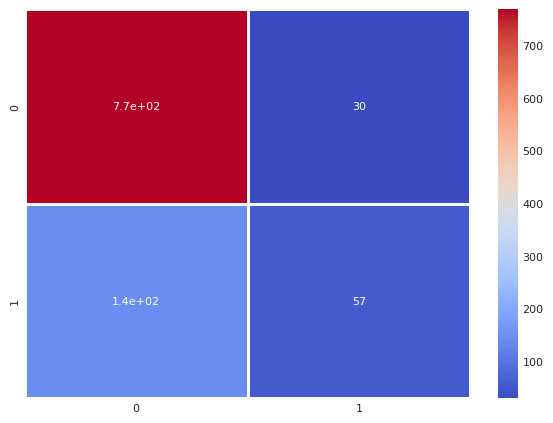

In [ ]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.825,0.655172,0.282178,0.394464,0.622292


### Decision Tree Classification
The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.
### Advantages of descion trees
Decision trees are easy to interpret.
To build a decision tree requires little data preparation from the user- there is no need to normalize data
### Disadvantages of Descision Trees
Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [ ]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = dct.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[649, 149],
       [120,  82]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.731,0.354978,0.405941,0.378753,0.609612


### Random Forest Classification
Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

**Step1:-** Pick at random K data points from the training set

**Step2:-** Build the Decision tree associated to these K data points

**Step3:-** Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

**Step4:-** For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[756,  42],
       [139,  63]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.819,0.6,0.311881,0.410423,0.629625


### XGBOOST classifier
it is Gradient Boosting Algorithm

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred =xgb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.807,0.535433,0.336634,0.413374,0.631349


### 8.Model Optimization using Grid Search and k-Fold Cross Validation
There is a better way that I know to get your parameters right, which is to use GridSearchCV. Essentially we give a parameters space and test our model on every point of this space, returning the ideal combination of parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

### 1) Grid search on Logistic Regression Model

In [ ]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}

In [ ]:
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)

In [ ]:
# Import necessary classes
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Assume X_train and y_train are already defined as your training dataset
# Step 1: Define the model
model = LogisticRegression()

# Step 2: Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Example parameter: Regularization strength
    'solver': ['liblinear', 'saga']  # Example parameter: Algorithm to use for optimization
}

# Step 3: Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Step 4: Fit GridSearchCV to the training data
grid_search_log = grid_search.fit(X_train, y_train)

# To see the best parameters found by GridSearchCV
print("Best parameters:", grid_search_log.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_log.best_score_))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1, 'solver': 'liblinear'}
Best cross-validation score: 0.81


In [ ]:
best_accuracy = grid_search_log.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.8067500000000001


In [ ]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 1, 'solver': 'liblinear'}

In [ ]:
y_pred_log = grid_search_log.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

In [ ]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.833,0.666667,0.346535,0.456026,0.651338


### 2) Grid Search on Stochastic Gradient Descent

In [ ]:
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}
grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_sgd = grid_search_sgd.fit(X_train,y_train)


In [ ]:
best_accuracy_1 = grid_search_sgd.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8087500000000001


In [ ]:
best_parameters_2 = grid_search_sgd.best_params_
best_parameters_2

{'alpha': 0.01, 'class_weight': None}

In [ ]:
y_pred_sgd = grid_search_sgd.predict(X_test)

In [ ]:
sgd_prob = grid_search_sgd.predict_proba(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_sgd)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
rec = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)
model =  pd.DataFrame([['Stochastic Gradient Descent Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
if 'model_results' not in globals():
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Using pd.concat to append the new model's metrics
model_results = pd.concat([model_results, model], ignore_index=True)

# Display the updated results
model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.833,0.666667,0.346535,0.456026,0.651338
1,Stochastic Gradient Descent Tuned,0.833,0.676768,0.331683,0.445183,0.645791


<Axes: >

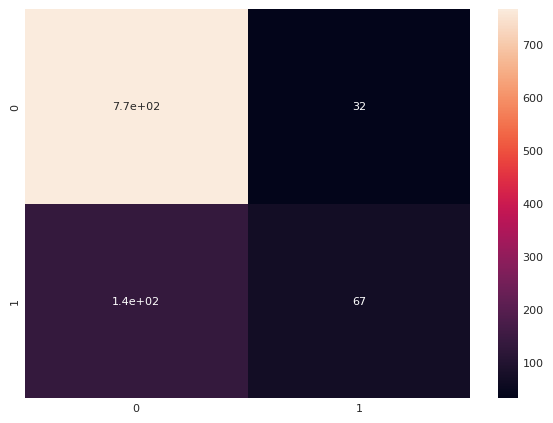

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm,annot=True)

### 3) Grid Search on SVM Model

In [ ]:
scv_params = [{'C':[0.001,0.01,0.1,1,10,1000],'kernel':['linear']},
               {'C':[0.001,0.01,0.1,1,10,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.0001]}]


In [ ]:
grid_search_1 = GridSearchCV(estimator=scv,param_grid=scv_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_1 = grid_search_1.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_1.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8167500000000001


In [ ]:
best_parameters = grid_search_1.best_params_
best_parameters

{'C': 1, 'kernel': 'linear'}

In [ ]:
y_pred_svc =grid_search_1.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_svc)
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
model =  pd.DataFrame([['SVC MODEL TUNED', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
if 'model_results' not in globals():
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Using pd.concat to append the new model's metrics
model_results = pd.concat([model_results, model], ignore_index=True)

# Display the updated results
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.833,0.666667,0.346535,0.456026,0.651338
1,Stochastic Gradient Descent Tuned,0.833,0.676768,0.331683,0.445183,0.645791
2,SVC MODEL TUNED,0.831,0.643478,0.366337,0.466877,0.657479


### 4) Grid Search on KNN classifier
We will be using the optimsed-for-performance implemented function of KNN provided by the scikit-learn package. We will also loop over k=1 to 30 and observe the recall in all these cases to find the best suitable value of K for our problem.

In [ ]:
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}


In [ ]:
grid_search = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8067499999999999


In [ ]:
best_parameters = grid_search.best_params_
best_parameters

{'leaf_size': 1, 'n_neighbors': 23, 'weights': 'uniform'}

In [ ]:
y_pred_KNN = grid_search.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)
model =  pd.DataFrame([['KNN Model Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
if 'model_results' not in globals():
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Using pd.concat to append the new model's metrics
model_results = pd.concat([model_results, model], ignore_index=True)

# Display the updated results
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.833,0.666667,0.346535,0.456026,0.651338
1,Stochastic Gradient Descent Tuned,0.833,0.676768,0.331683,0.445183,0.645791
2,SVC MODEL TUNED,0.831,0.643478,0.366337,0.466877,0.657479
3,KNN Model Tuned,0.820,0.617021,0.287129,0.391892,0.621008


### 5) Grid Search on Decision Tree

In [ ]:
#dct_param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=dct,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_dt.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.81525


In [ ]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

{'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [ ]:
y_pred_dct = grid_search_dt.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
if 'model_results' not in globals():
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Using pd.concat to append the new model's metrics
model_results = pd.concat([model_results, model], ignore_index=True)

# Display the updated results
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.833,0.666667,0.346535,0.456026,0.651338
1,Stochastic Gradient Descent Tuned,0.833,0.676768,0.331683,0.445183,0.645791
2,SVC MODEL TUNED,0.831,0.643478,0.366337,0.466877,0.657479
3,KNN Model Tuned,0.820,0.617021,0.287129,0.391892,0.621008
4,Decision Tree Tuned,0.825,0.658824,0.277228,0.390244,0.620443


### 6) Grid Search on Random Forest

In [ ]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8055000000000001


In [ ]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 1000}

In [ ]:
y_pred_rf = grid_search_rf.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
if 'model_results' not in globals():
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Using pd.concat to append the new model's metrics
model_results = pd.concat([model_results, model], ignore_index=True)

# Display the updated results
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.833,0.666667,0.346535,0.456026,0.651338
1,Stochastic Gradient Descent Tuned,0.833,0.676768,0.331683,0.445183,0.645791
2,SVC MODEL TUNED,0.831,0.643478,0.366337,0.466877,0.657479
3,KNN Model Tuned,0.820,0.617021,0.287129,0.391892,0.621008
4,Decision Tree Tuned,0.825,0.658824,0.277228,0.390244,0.620443
5,Random Forest Tuned,0.817,0.597938,0.287129,0.387960,0.619128



### 7) Grid Search on XGBOOST Classifier

In [ ]:
param_grid_xgb ={'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,scoring='accuracy',cv=5,n_jobs=-1)
grid_seaech_xgb = grid_search_xgb.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_xgb.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.806


In [ ]:
best_parameters_2 = grid_search_xgb.best_params_
best_parameters_2

{'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 50}

In [ ]:
y_pred_xgb = grid_search_xgb.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
model =  pd.DataFrame([['XGBOOST Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
if 'model_results' not in globals():
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Using pd.concat to append the new model's metrics
model_results = pd.concat([model_results, model], ignore_index=True)

# Display the updated results
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.833,0.666667,0.346535,0.456026,0.651338
1,Stochastic Gradient Descent Tuned,0.833,0.676768,0.331683,0.445183,0.645791
2,SVC MODEL TUNED,0.831,0.643478,0.366337,0.466877,0.657479
3,KNN Model Tuned,0.820,0.617021,0.287129,0.391892,0.621008
4,Decision Tree Tuned,0.825,0.658824,0.277228,0.390244,0.620443
5,Random Forest Tuned,0.817,0.597938,0.287129,0.387960,0.619128
6,XGBOOST Tuned,0.830,0.650943,0.341584,0.448052,0.647609


# ROC CURVE
**Receiver Operating Characteristic(ROC)** summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate.

ROC summarizes the predictive power for all possible values of p > 0.5.  The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

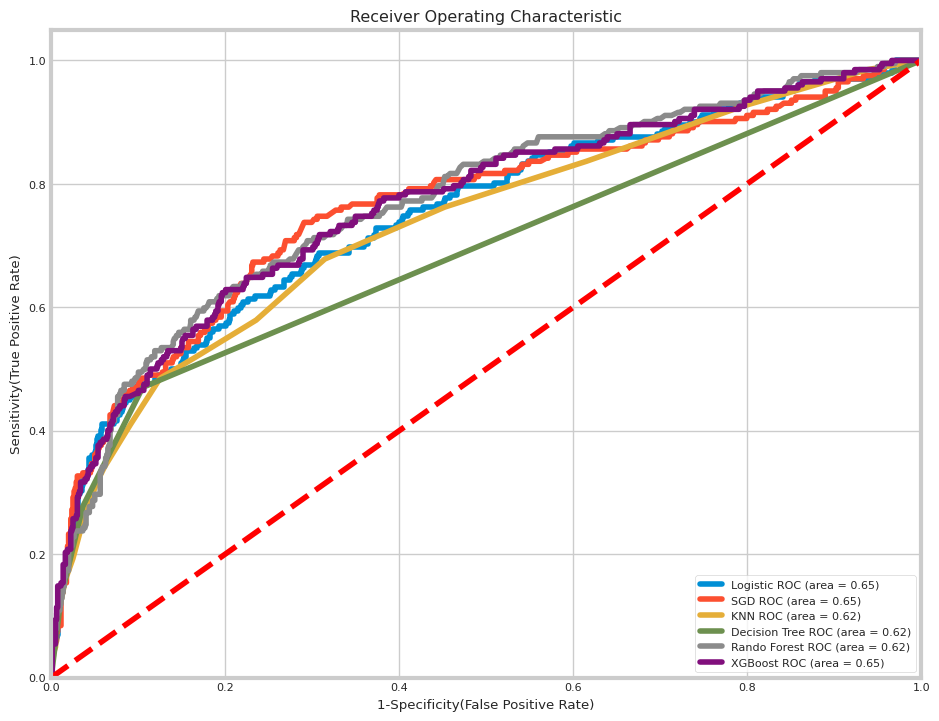

In [ ]:
from sklearn import metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity
y_pred_log_p =grid_search_log.predict_proba(X_test)[:,1]
y_pred_sgd_p =grid_search_sgd.predict_proba(X_test)[:,1]
#y_pred_svc_p =grid_search_1.predict_proba(X_test)[:,1]
y_pred_knn_p =grid_search.predict_proba(X_test)[:,1]
y_pred_dt_p =grid_search_dt.predict_proba(X_test)[:,1]
y_pred_rf_p =grid_search_rf.predict_proba(X_test)[:,1]
y_pred_xgb_p =grid_search_xgb.predict_proba(X_test)[:,1]

model = [grid_search_log,grid_search_sgd,grid_search,grid_search_dt,grid_search_rf,grid_search_xgb]

models=[y_pred_log_p,y_pred_sgd_p,y_pred_knn_p,y_pred_dt_p,y_pred_rf_p,y_pred_xgb_p]
label=['Logistic','SGD','KNN','Decision Tree','Rando Forest','XGBoost']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(6)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### For Model Evaluation we are referreing Confusion Matrix
After we train a logistic regression model on some training data, we will evaluate the performance of the model on some test data. For this, we use the Confusion Matrix


the accuracy of the model : - ( TP + TN ) / Total

Here, TP stands for True Positive which are the cases in which we predicted yes and the actual value was true. TN stands for True Negative which are the cases in which we predicted no and the actual value was false.FP stands for False Positive which are the cases which we predicted yes and the actual value was False.FN stands for False Negative which are the cases which we predicted No and the actual value was true.

## Conclusion
1)Using a **Logistic Regression**  classifier, we can predict with **82.5% accuracy**, whether a customer is likely to default next month.

2)Using a **Stochastic Gradient Descent**  classifier, we can predict with **83.33% accuracy**, whether a customer is likely to default next month.

3)Using a **Support Vector Machine**  classifier, we can predict with **80.83% accuracy**, whether a customer is likely to default next month.

4)Using a **K-Nearest Neighbour**  classifier, we can predict with **80.83% accuracy**, whether a customer is likely to default next month.

5)Using a **Decision Tree  classifier**, we can predict with **82.83% accuracy**, whether a customer is likely to default next month.

6)Using a **Random Forest  classifier**, we can predict with **81% accuracy**, whether a customer is likely to default next month.

7)Using a **XGBOOST**  classifier, we can predict with **82.16% accuracy**, whether a customer is likely to default next month.


The strongest predictors of default are the **PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months)**.

**We found that using Stochastic Gradient Descent and Decision Tree are better.**

**Demographics**: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.